## Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
pip install deap

In [ ]:
from deap import base, creator, tools, algorithms

# Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Preprocessing

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage_df = pd.DataFrame(missing_percentage, columns=['Missing Percentage']).reset_index()
missing_percentage_df.columns = ['Feature', 'Missing Percentage']
missing_percentage_df

Feature  Missing Percentage
0               Pregnancies            0.000000
1                   Glucose            0.651042
2             BloodPressure            4.557292
3             SkinThickness           29.557292
4                   Insulin           48.697917
5                       BMI            1.432292
6  DiabetesPedigreeFunction            0.000000
7                       Age            0.000000
8                   Outcome            0.000000

<ipython-input-379-d7176dbc4f29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Missing Percentage', data=missing_percentage_df, palette='viridis')


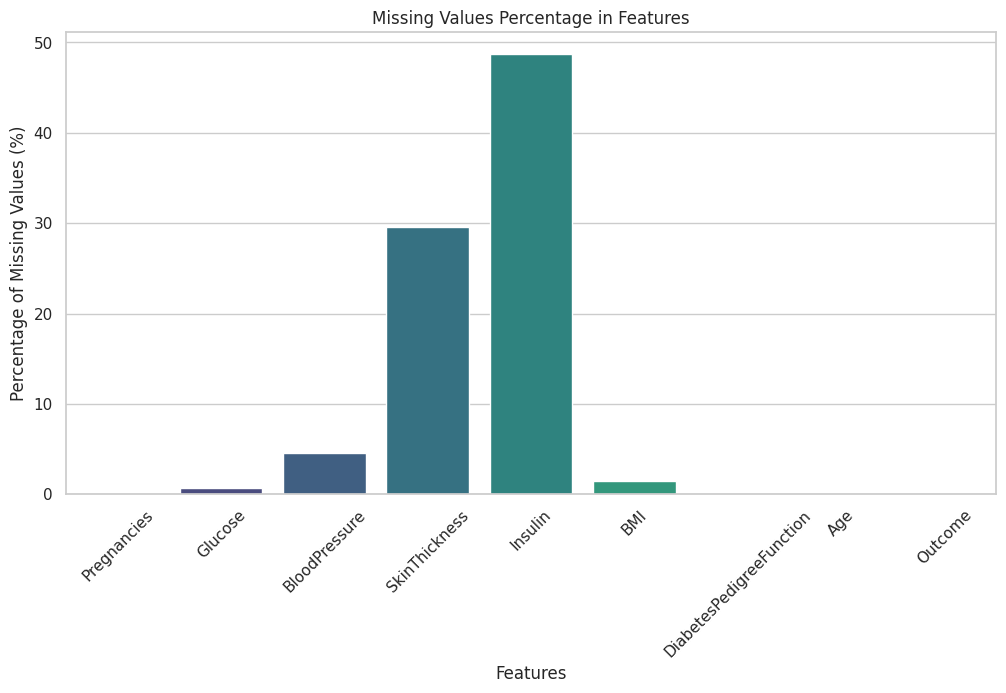

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Missing Percentage', data=missing_percentage_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Missing Values Percentage in Features')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values (%)')
plt.show()

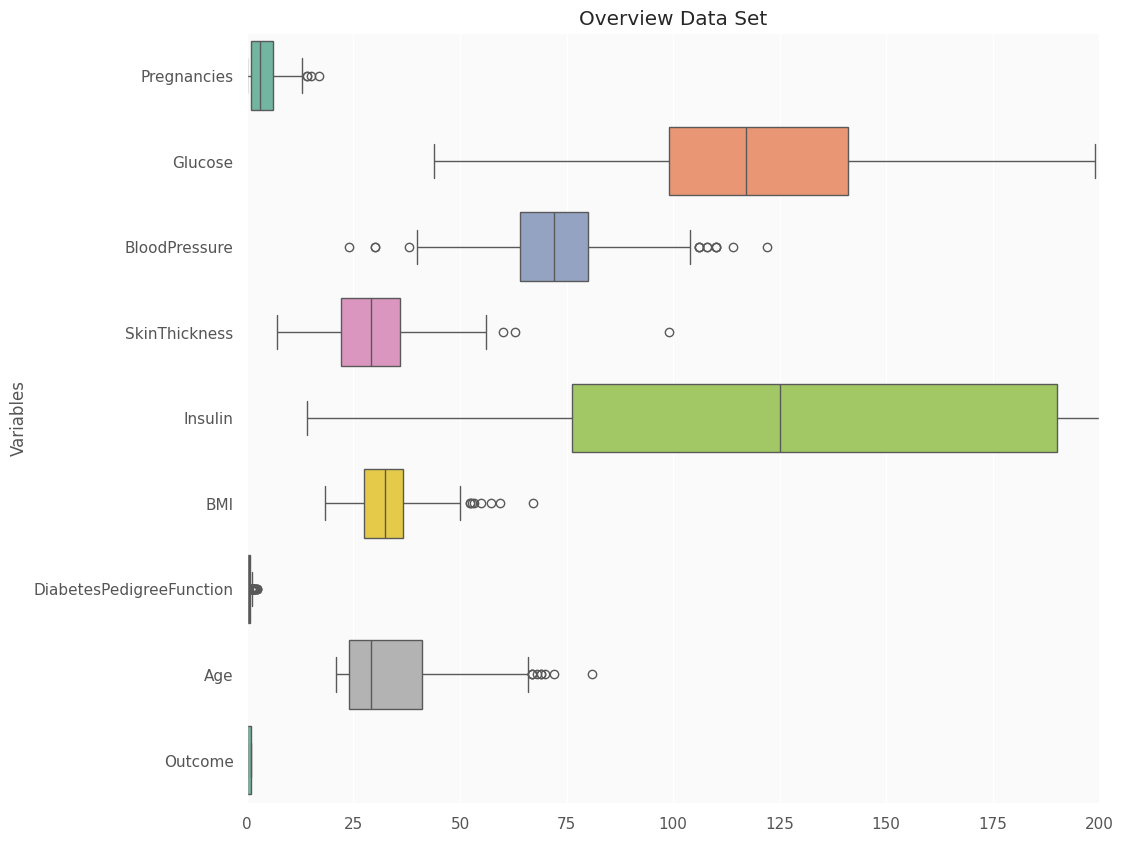

In [ ]:
plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(11, 10))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df,
  orient = 'h',
  palette = 'Set2')

<Axes: >

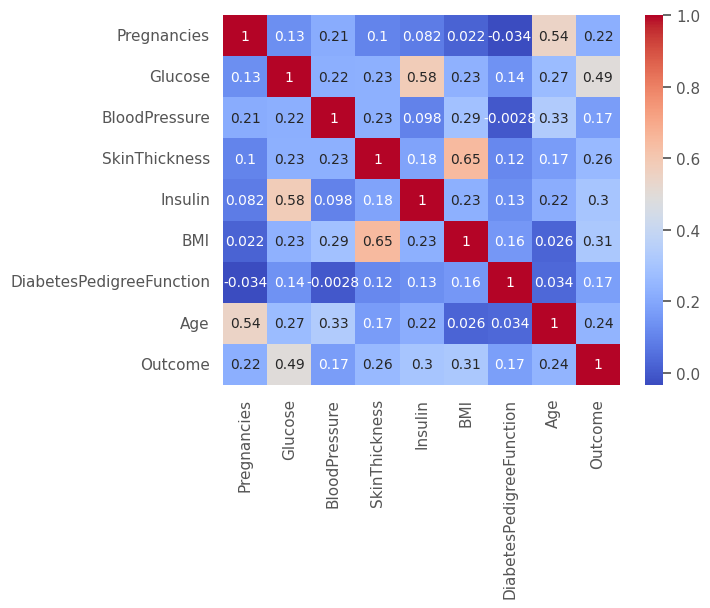

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Treatment Null Value

In [ ]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

<Axes: xlabel='Insulin', ylabel='Count'>

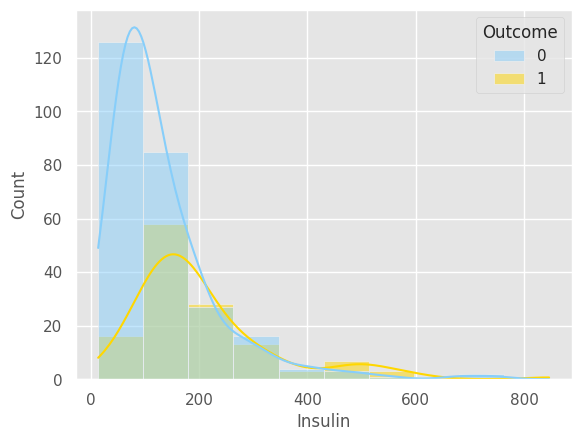

In [ ]:
sns.histplot(data=df[df['Insulin'] != 0], x='Insulin', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

In [ ]:
median_target('Insulin')

Outcome  Insulin
0        0    102.5
1        1    169.5

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

<Axes: xlabel='Glucose', ylabel='Count'>

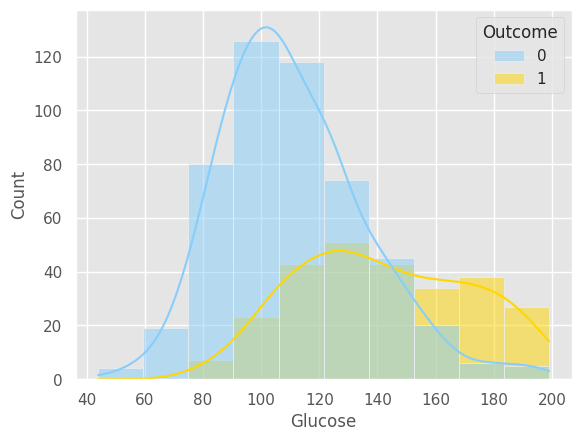

In [ ]:
sns.histplot(data=df[df['Glucose'] != 0], x='Glucose', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

In [ ]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

<Axes: xlabel='SkinThickness', ylabel='Count'>

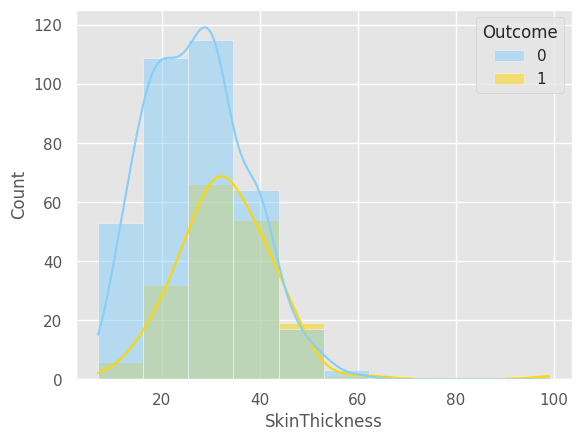

In [ ]:
sns.histplot(data=df[df['SkinThickness'] != 0], x='SkinThickness', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

In [ ]:
median_target('SkinThickness')

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

<Axes: xlabel='BloodPressure', ylabel='Count'>

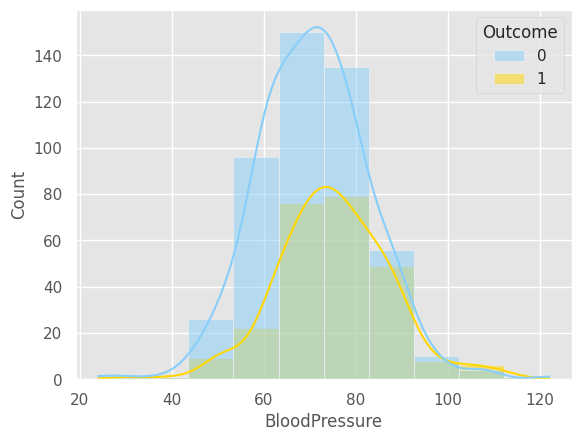

In [ ]:
sns.histplot(data=df[df['BloodPressure'] != 0], x='BloodPressure', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

In [ ]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

<Axes: xlabel='BMI', ylabel='Count'>

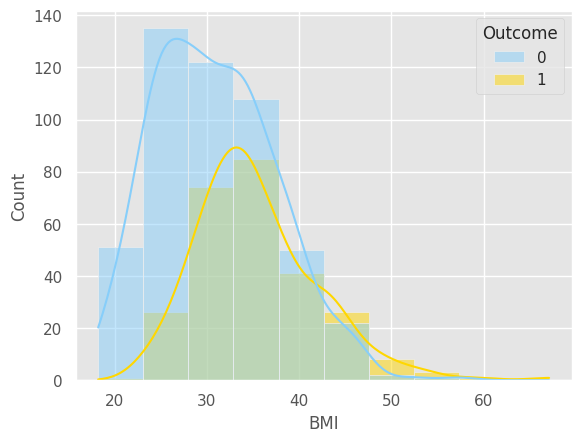

In [ ]:
sns.histplot(data=df[df['BMI'] != 0], x='BMI', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

In [ ]:
median_target('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

<Axes: xlabel='Age', ylabel='Count'>

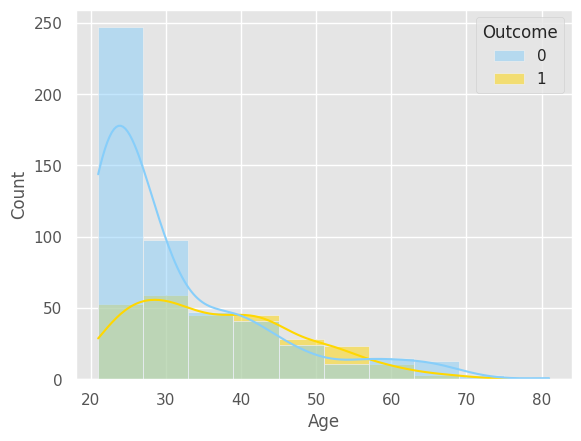

In [ ]:
sns.histplot(data=df[df['Age'] != 0], x='Age', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

<Axes: xlabel='Pregnancies', ylabel='Count'>

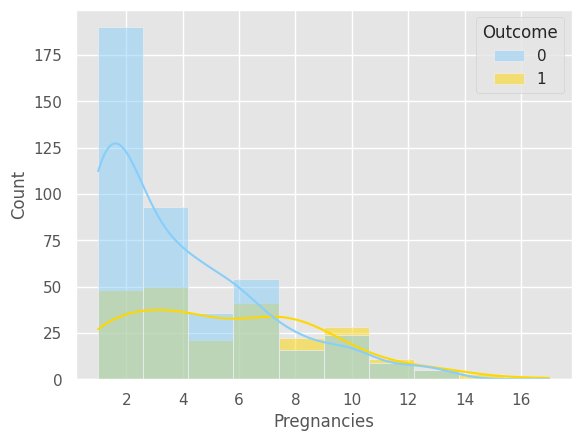

In [ ]:
sns.histplot(data=df[df['Pregnancies'] != 0], x='Pregnancies', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

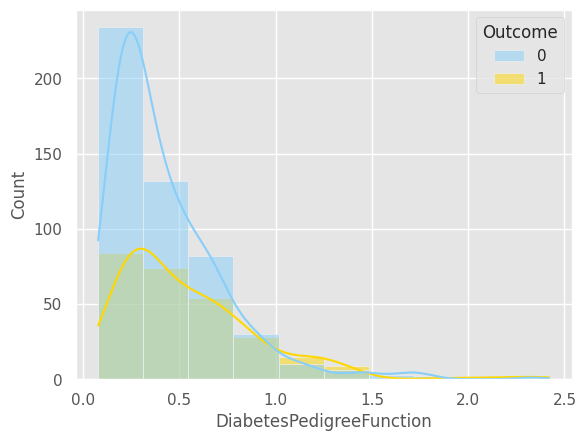

In [ ]:
sns.histplot(data=df[df['DiabetesPedigreeFunction'] != 0], x='DiabetesPedigreeFunction', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Feature Engineering

In [ ]:
def plot_feat1_feat2(feat1, feat2):
    D = df[df['Outcome'] != 0]
    H = df[df['Outcome'] == 0]

    plt.figure(figsize=(10, 6))
    plt.scatter(D[feat1], D[feat2], color='#FFD700', label='Diabetic', edgecolor='black', alpha=0.7)
    plt.scatter(H[feat1], H[feat2], color='#7EC0EE', label='Healthy', edgecolor='black', alpha=0.7)
    plt.title(f'{feat1} vs {feat2}')
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
def barplot(var_select, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var_select, hue='Outcome', palette=['gold', 'lightblue'], edgecolor='black')

    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2,
                       height + 1,
                       f'{int(height)}',
                       ha="center",
                       va='bottom',
                       fontsize=9)

    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel('')

    ax2 = plt.gca().twinx()
    outcome_counts = df.groupby([var_select, 'Outcome']).size().unstack(fill_value=0)
    percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100
    ax2.plot(percentages.index, percentages[1], color='black', marker='o', label='% diabetic')
    ax2.set_ylim(0, 85)
    ax2.set_ylabel('% diabetic')

    plt.legend(loc='upper right', fontsize=8, title_fontsize=9, bbox_to_anchor=(0.99, 0.85), frameon=True)
    plt.setp(plt.gca().get_legend().get_title(), fontsize=9)
    ax2.grid(False)


    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pie(var_select, sub):
    D = df[df['Outcome'] != 0]
    H = df[df['Outcome'] == 0]

    diabetic_counts = D[var_select].value_counts()
    healthy_counts = H[var_select].value_counts()
    colors = ['Silver', 'mediumturquoise', '#CF5C36', 'lightblue', 'magenta', '#FF5D73', '#F2D7EE', 'mediumturquoise']

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.pie(
        diabetic_counts,
        labels=diabetic_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(diabetic_counts)],
        wedgeprops=dict(edgecolor='black')
    )
    plt.text(0, -1.1, f'Diabetic: {len(D)}', fontsize=12, ha='center', va='center')
    plt.subplot(1, 2, 2)
    plt.pie(
        healthy_counts,
        labels=healthy_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(healthy_counts)],
        wedgeprops=dict(edgecolor='black')
    )
    plt.text(0, -1.1, f'Healthy: {len(H)}', fontsize=10, ha='center', va='center')

    plt.suptitle(f'Distribution of {var_select} by Outcome\n{sub}', fontsize=14, y=0.9)

    plt.tight_layout()
    plt.show()

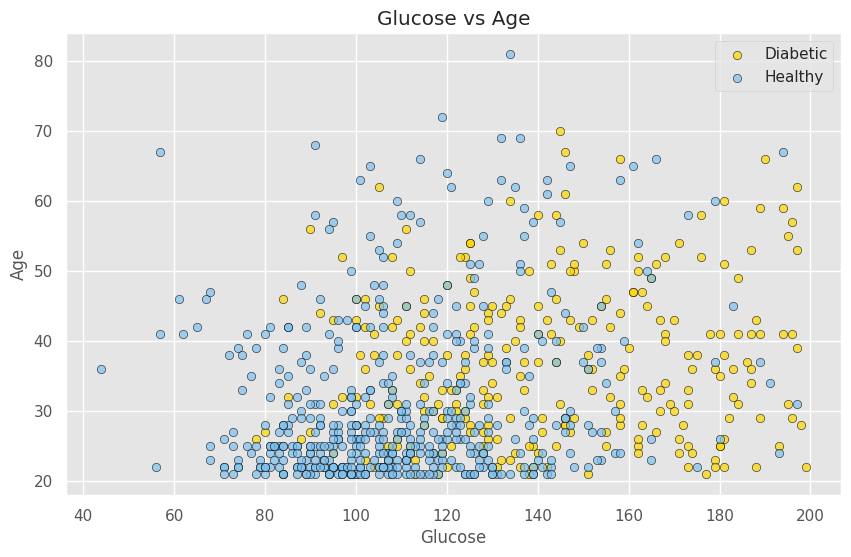

In [ ]:
plot_feat1_feat2('Glucose','Age')

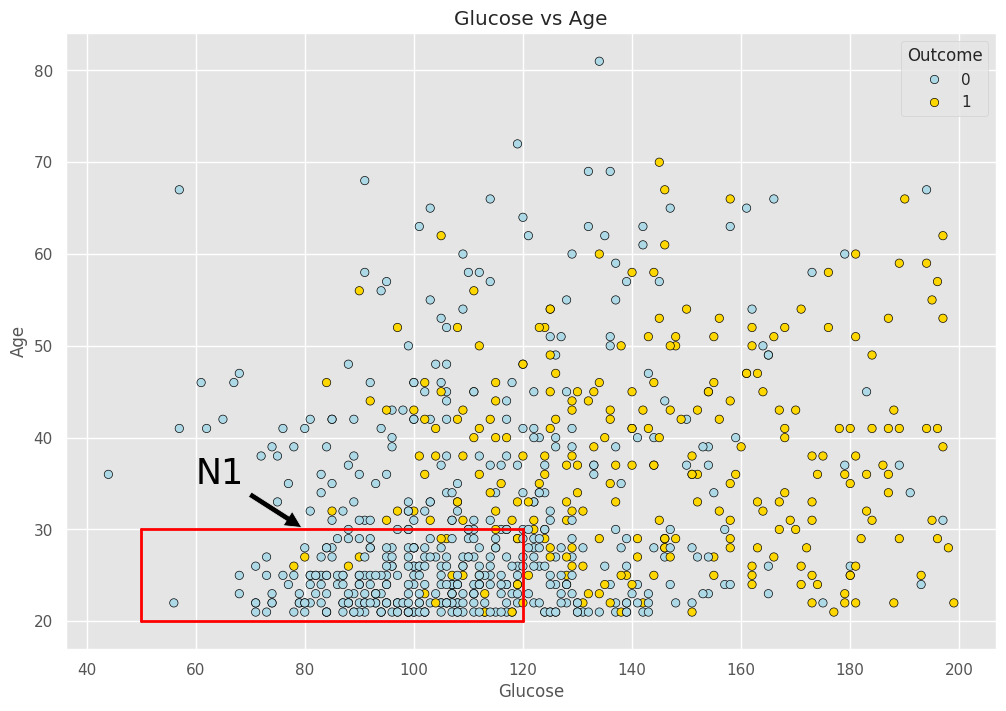

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Glucose'], y = df['Age'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

In [ ]:
df.loc[:,'N1']=0
df.loc[(df['Age']<=30) & (df['Glucose']<=120),'N1']=1

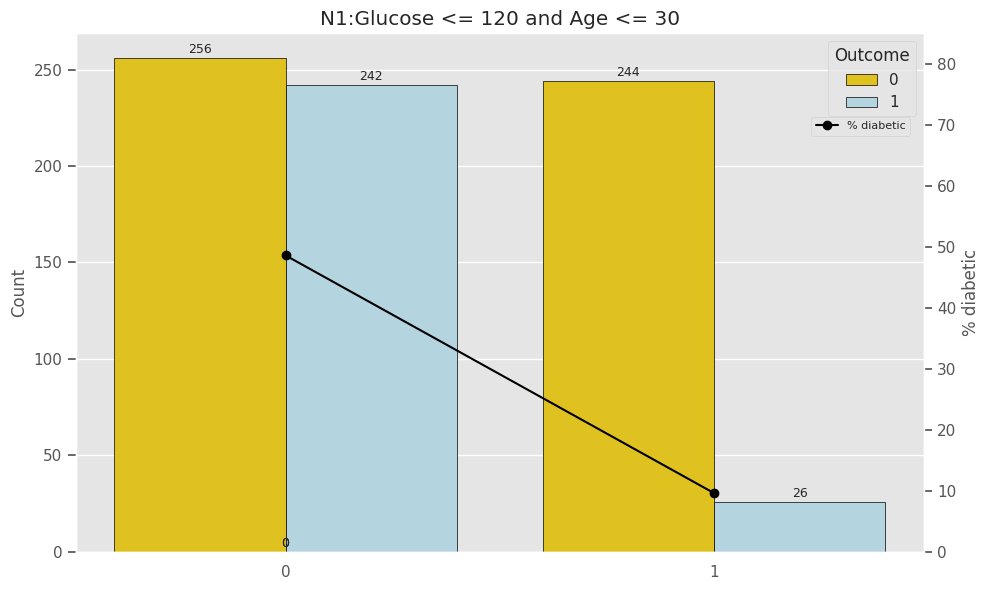

In [ ]:
barplot('N1', 'N1:Glucose <= 120 and Age <= 30')

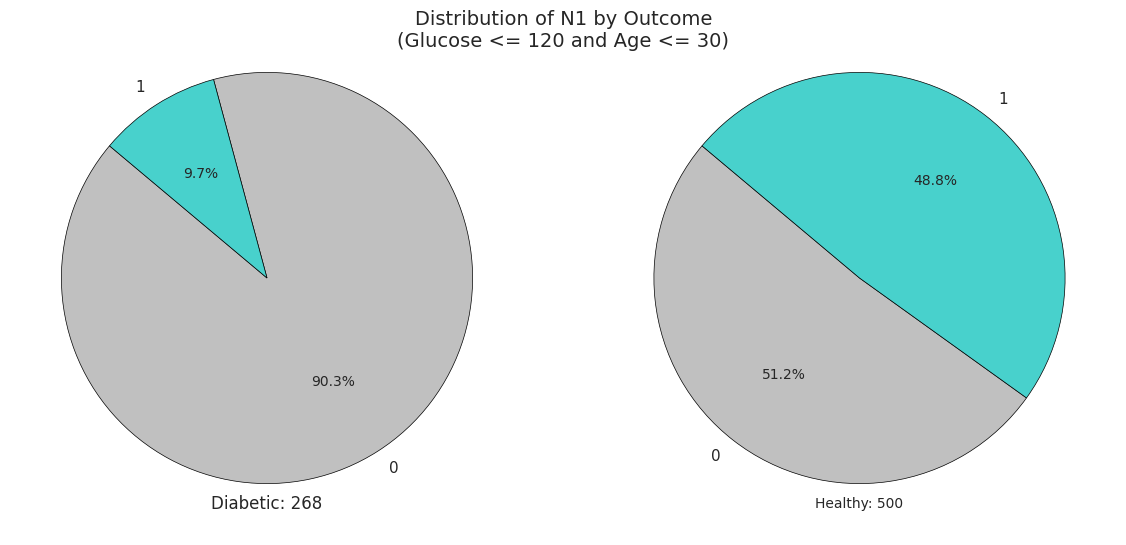

In [ ]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

In [ ]:
df.loc[:,'N2']=0
df.loc[(df['BMI']<=30),'N2']=1

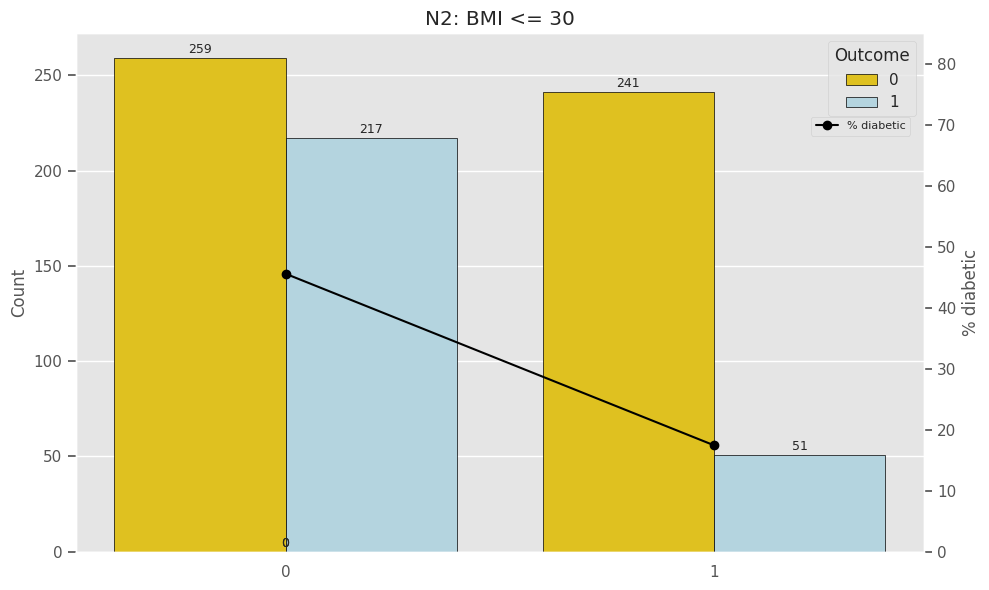

In [ ]:
barplot('N2', 'N2: BMI <= 30')

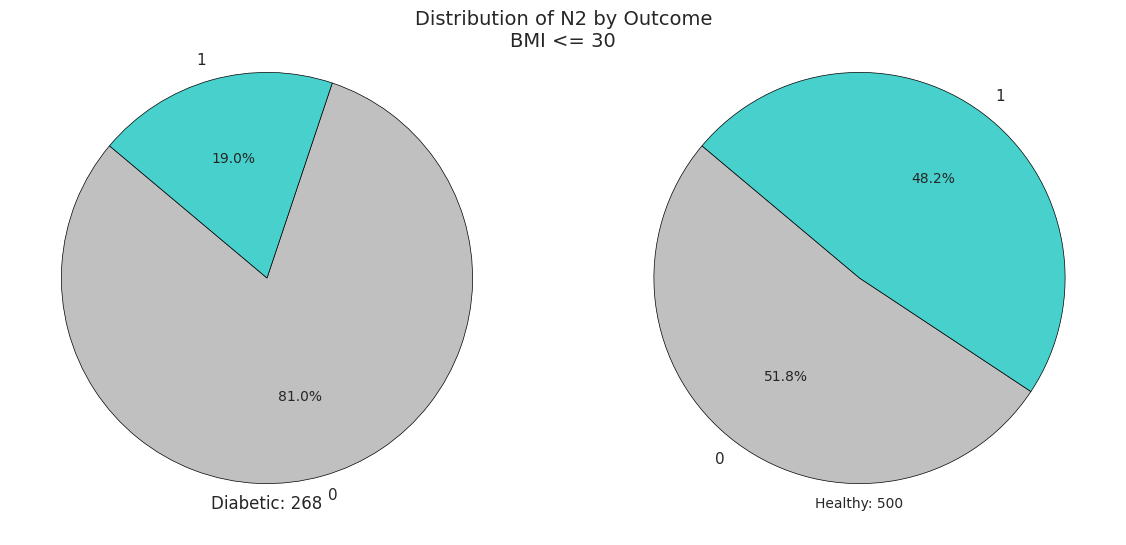

In [ ]:
plot_pie('N2', 'BMI <= 30')

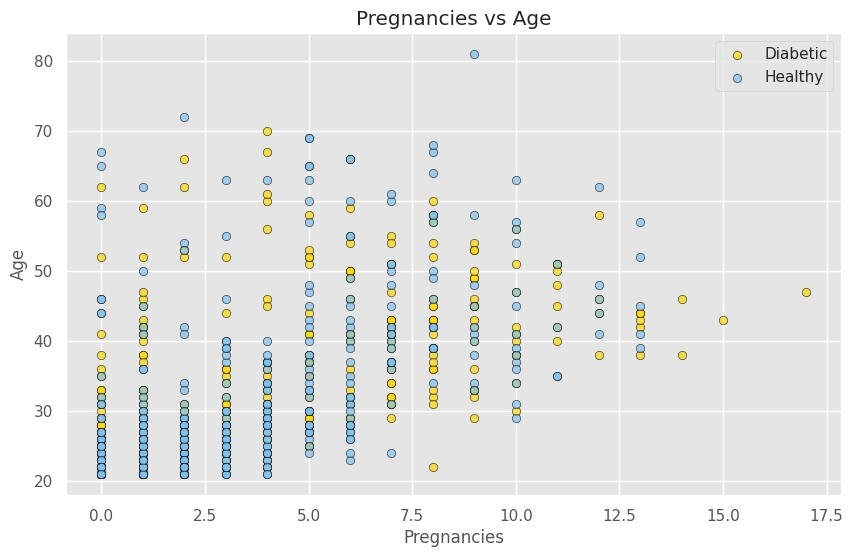

In [ ]:
plot_feat1_feat2('Pregnancies','Age')

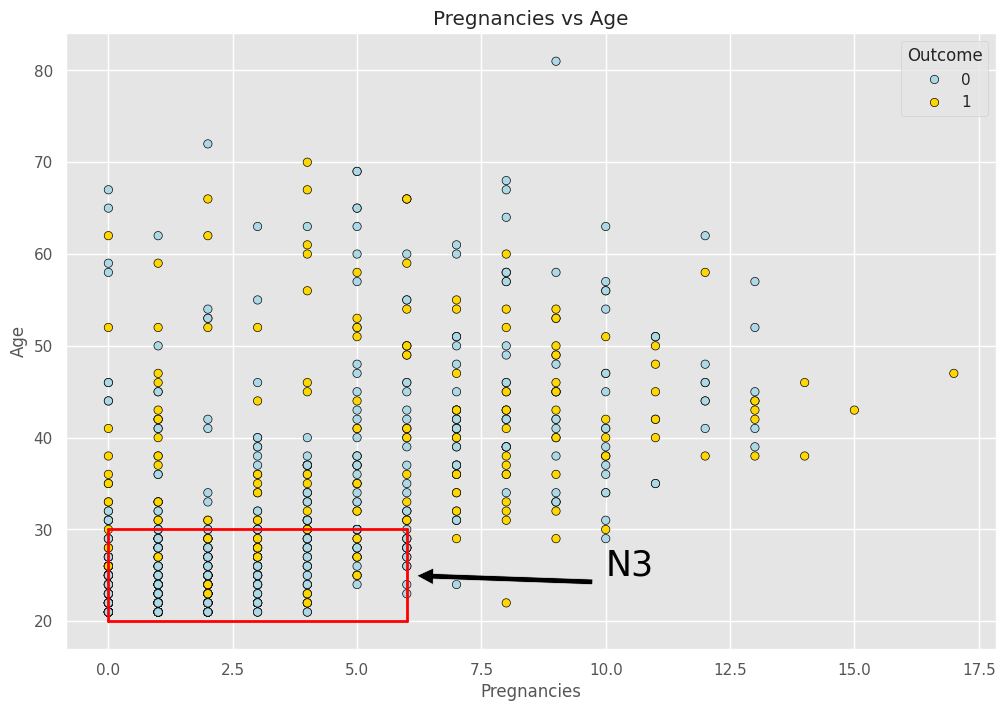

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Pregnancies'], y = df['Age'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 6], [30, 30], linewidth=2, color = 'red')
plt.plot([6, 6], [20, 30], linewidth=2, color = 'red')
plt.plot([0, 6], [20, 20], linewidth=2, color = 'red')
plt.plot([0, 0], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

In [ ]:
df.loc[:,'N3']=0
df.loc[(df['Age']<=30) & (df['Pregnancies']<=6),'N3']=1

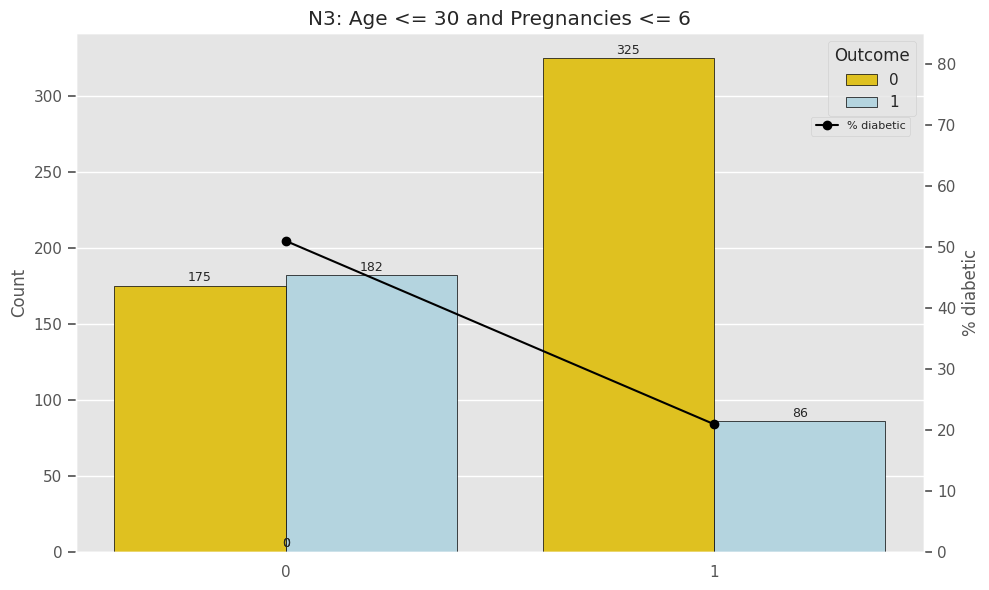

In [ ]:
barplot('N3', 'N3: Age <= 30 and Pregnancies <= 6')

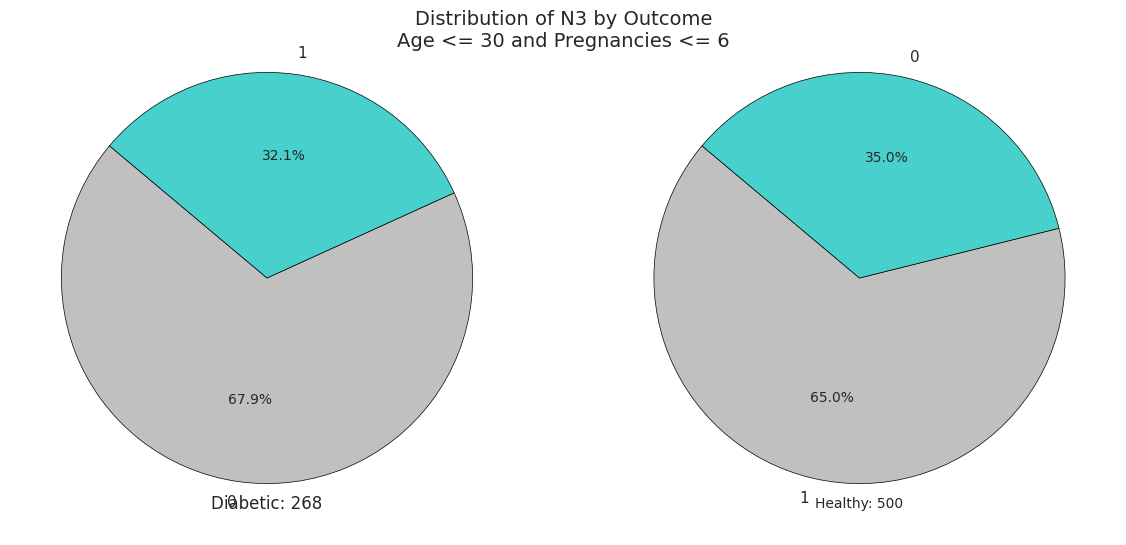

In [ ]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

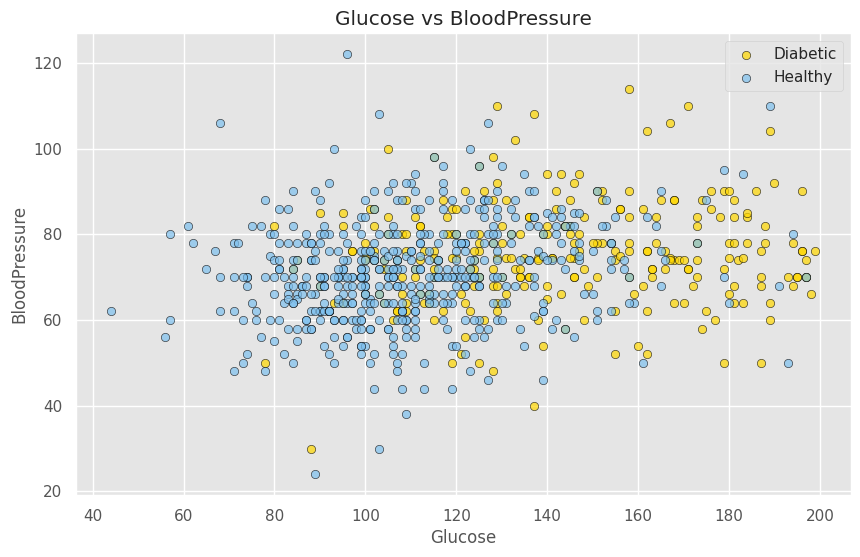

In [ ]:
plot_feat1_feat2('Glucose','BloodPressure')

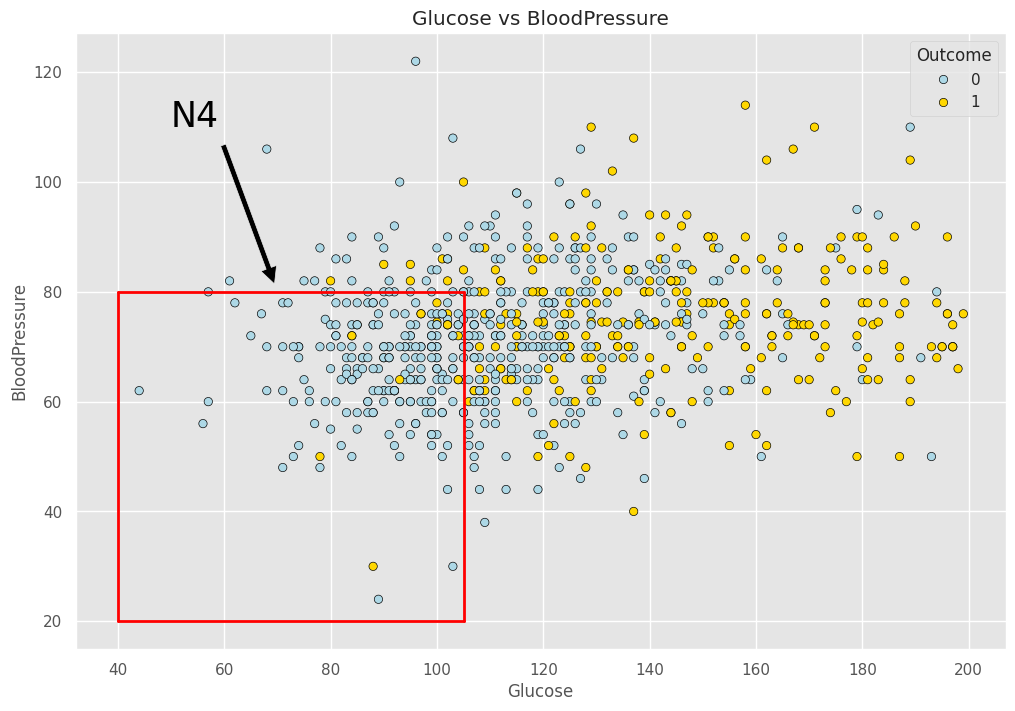

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Glucose'], y = df['BloodPressure'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N4', size=25, color='black', xy=(70, 80), xytext=(50, 110),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([40, 105], [80, 80], linewidth=2, color = 'red')
plt.plot([40, 40], [20, 80], linewidth=2, color = 'red')
plt.plot([40, 105], [20, 20], linewidth=2, color = 'red')
plt.plot([105, 105], [20, 80], linewidth=2, color = 'red')
plt.title('Glucose vs BloodPressure')
plt.show()

In [ ]:
df.loc[:,'N4']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4']=1

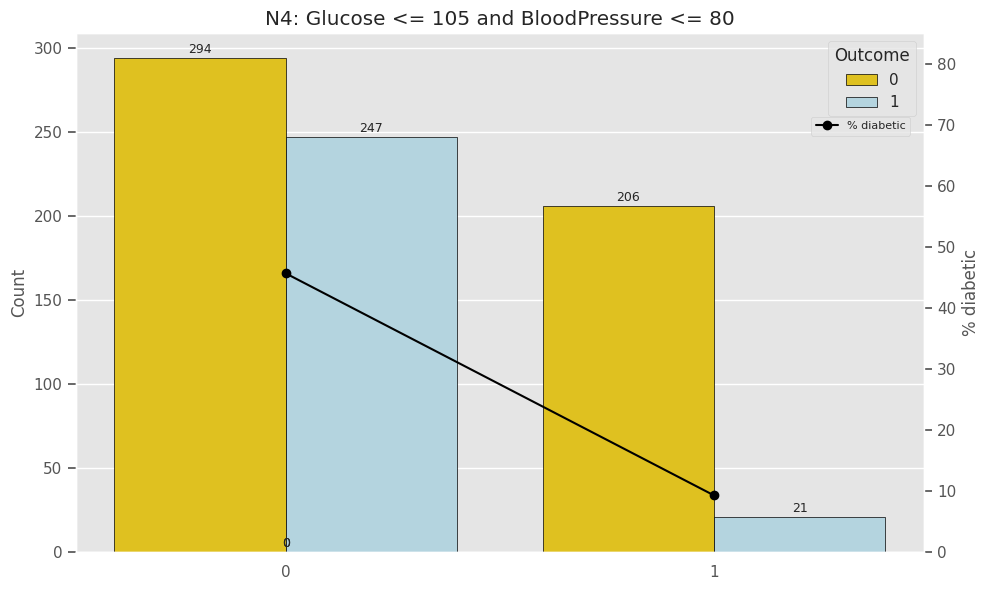

In [ ]:
barplot('N4', 'N4: Glucose <= 105 and BloodPressure <= 80')

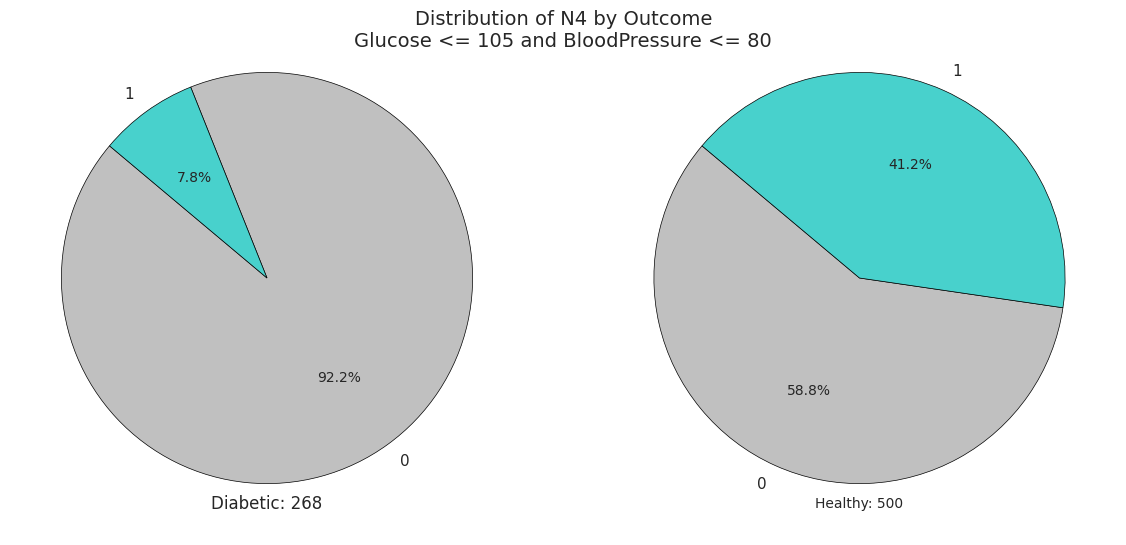

In [ ]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

In [ ]:
df.loc[:,'N5']=0
df.loc[(df['SkinThickness']<=20) ,'N5']=1

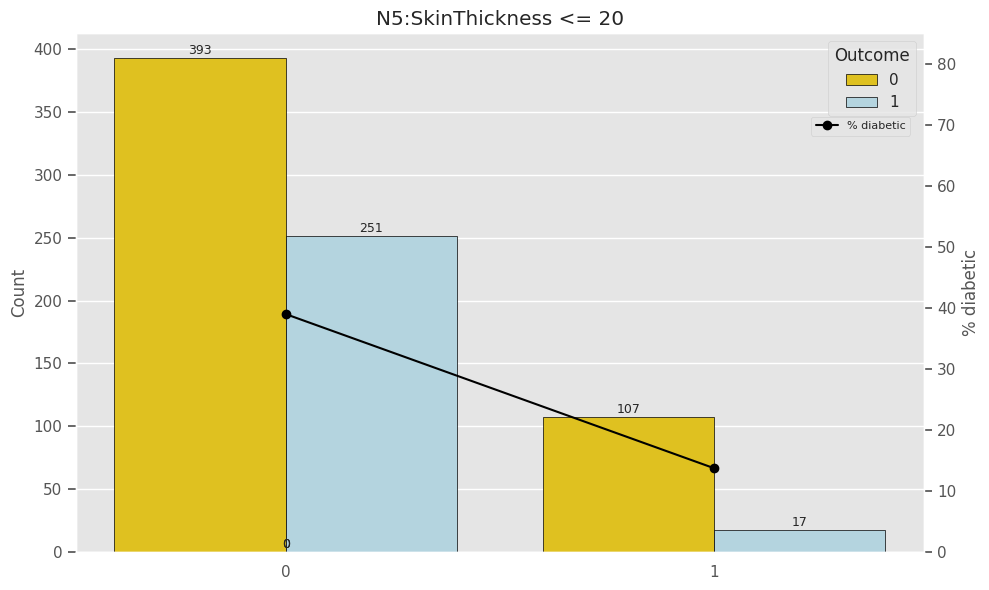

In [ ]:
barplot('N5', 'N5:SkinThickness <= 20')

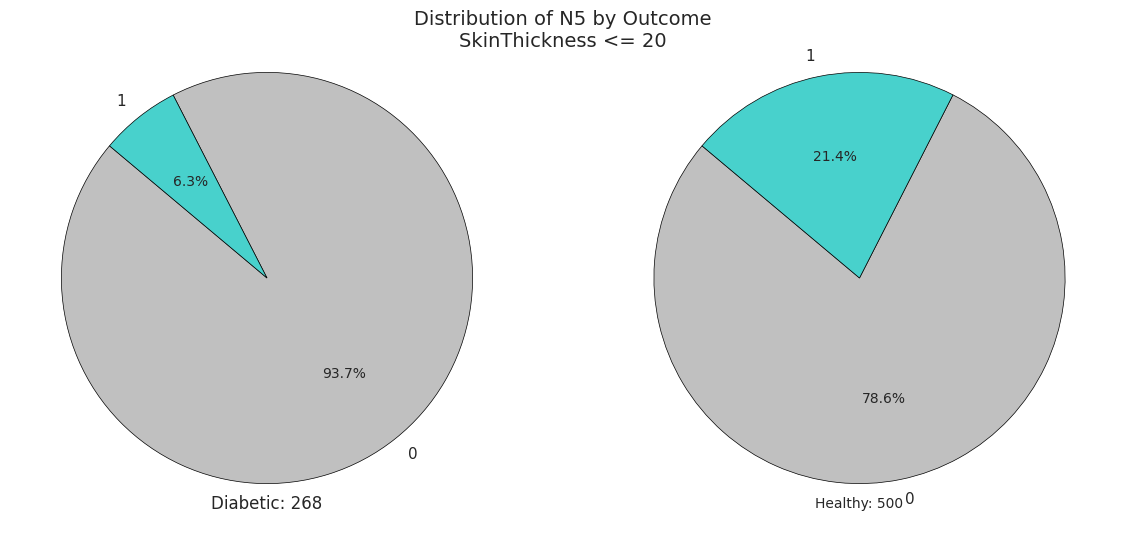

In [ ]:
plot_pie('N5', 'SkinThickness <= 20')

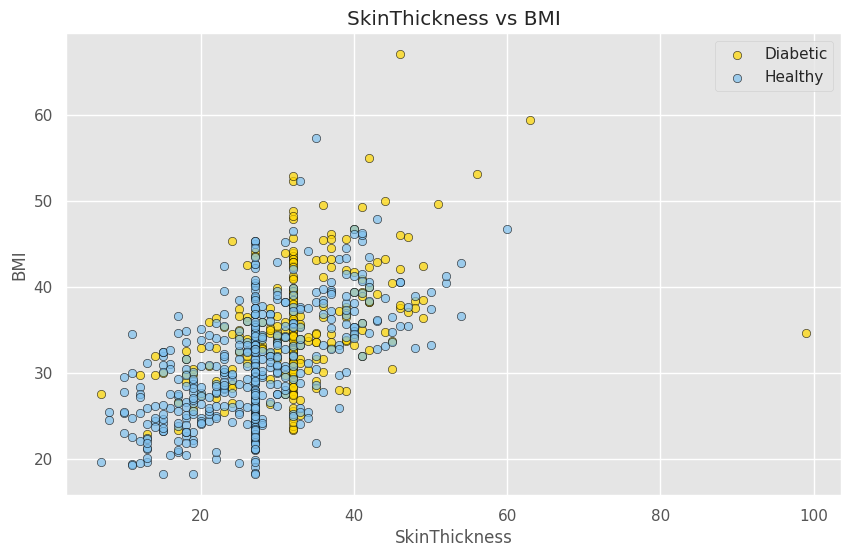

In [ ]:
plot_feat1_feat2('SkinThickness','BMI')

In [ ]:
df.loc[:,'N6']=0
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6']=1

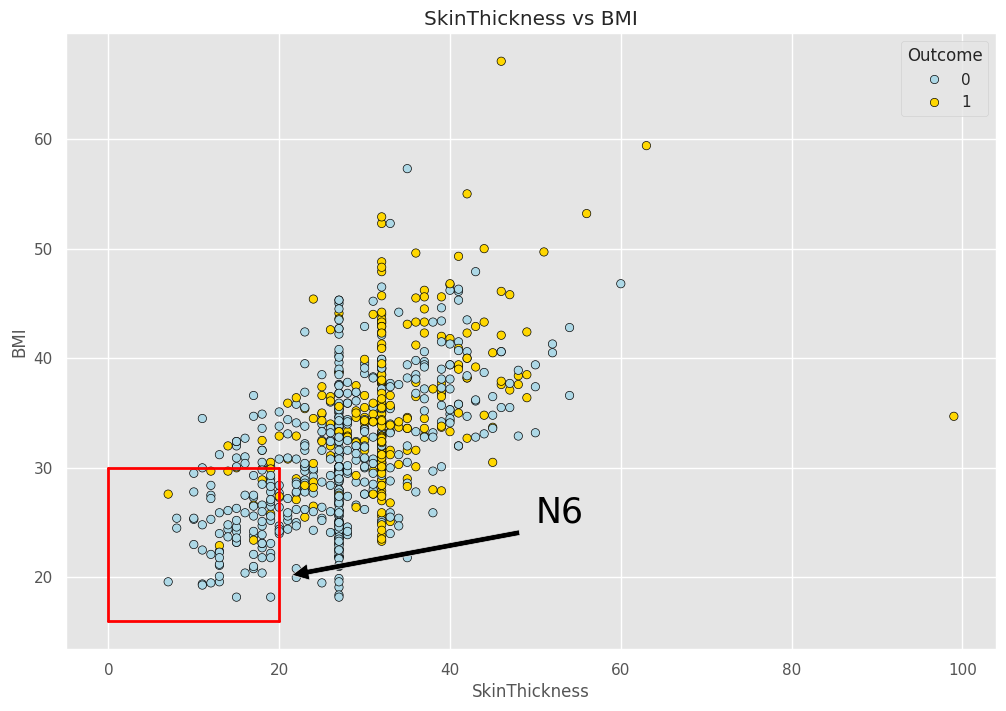

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['SkinThickness'], y = df['BMI'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

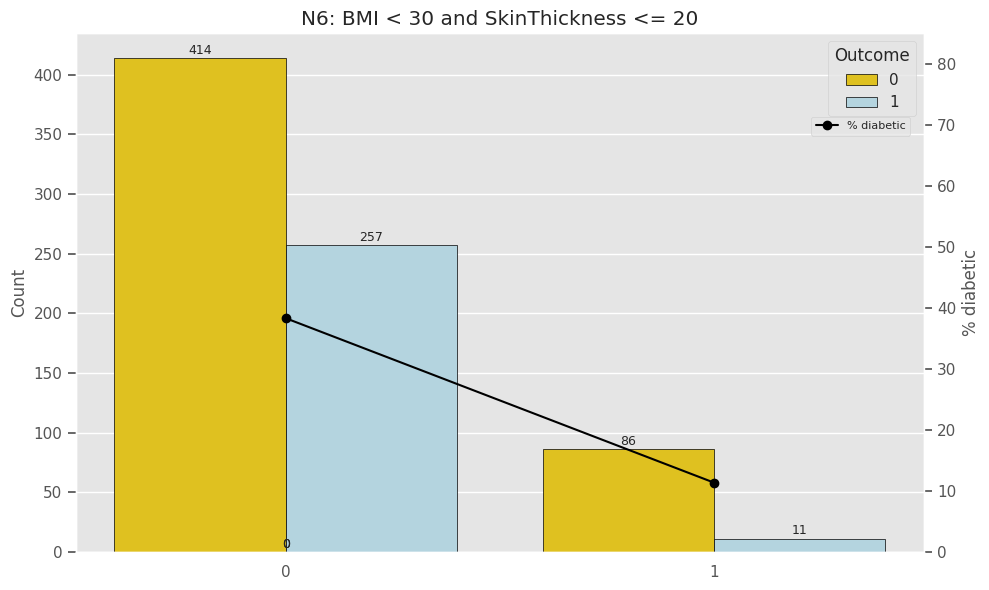

In [ ]:
barplot('N6', 'N6: BMI < 30 and SkinThickness <= 20')

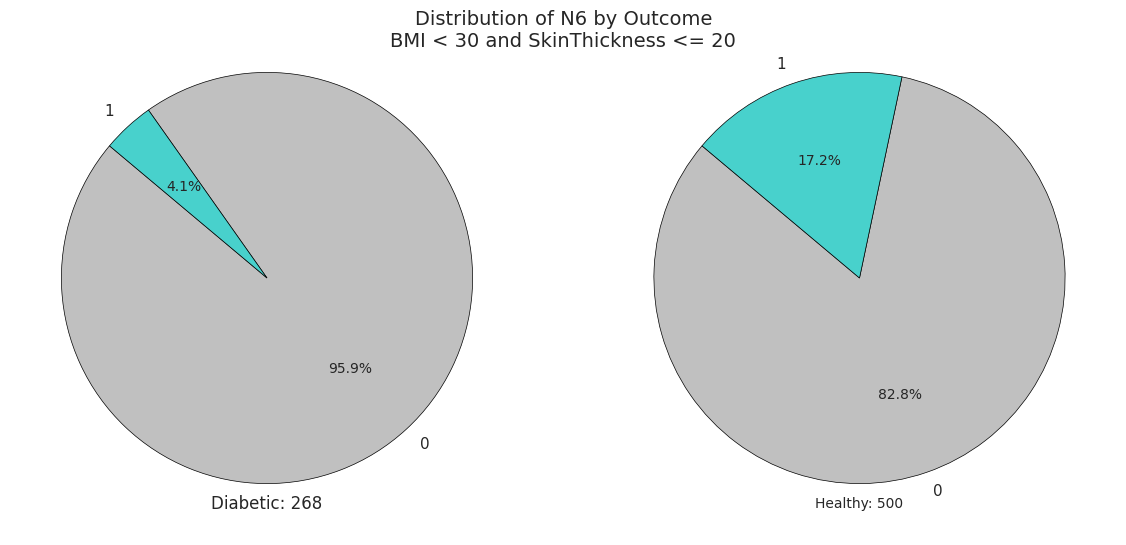

In [ ]:
plot_pie('N6', 'BMI < 30 and SkinThickness <= 20')

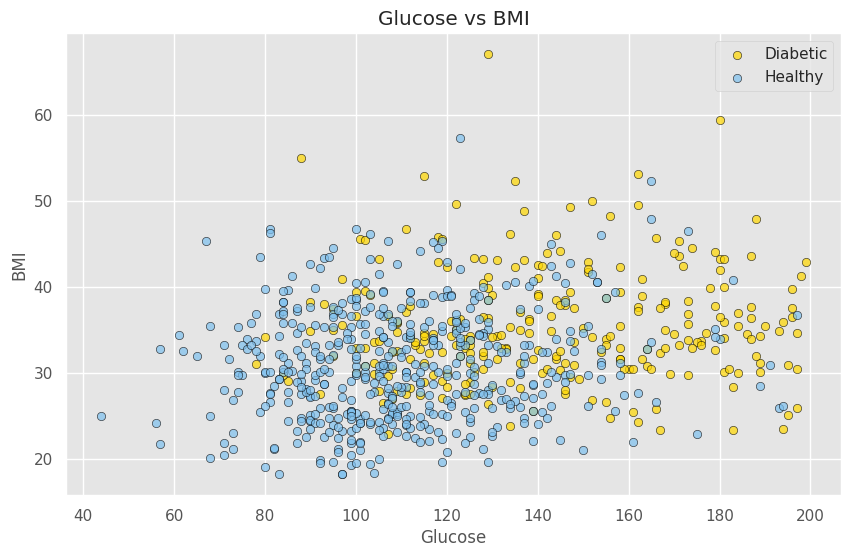

In [ ]:
plot_feat1_feat2('Glucose','BMI')

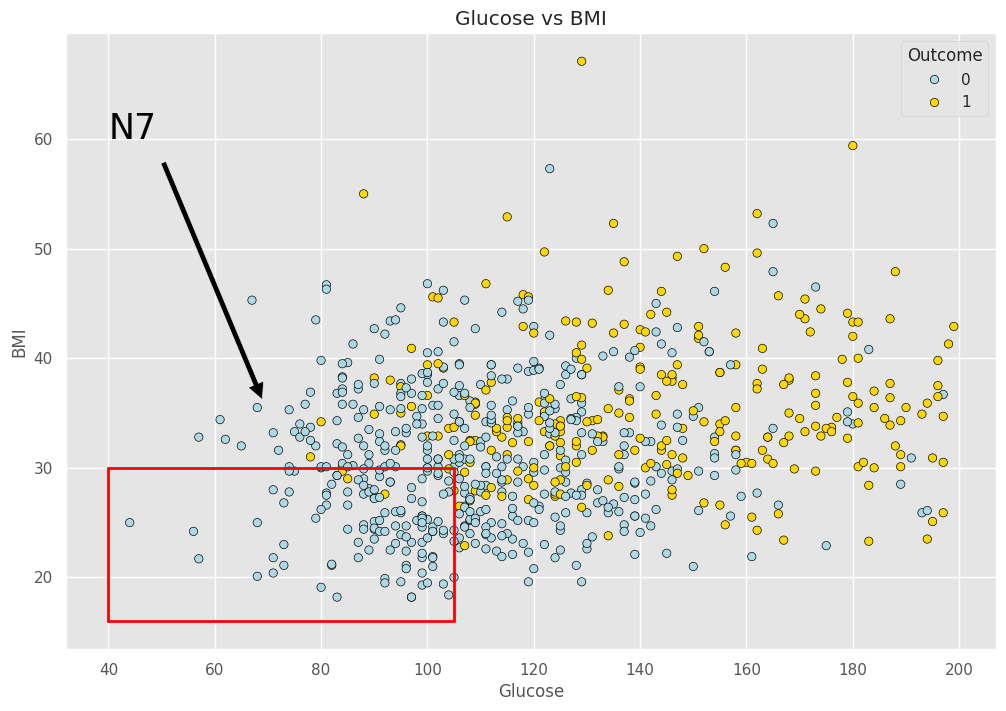

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Glucose'], y = df['BMI'], hue = "Outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N7', size=25, color='black', xy=(70, 35), xytext=(40, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([105, 105], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 40], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 105], [16, 16], linewidth=2, color = 'red')
plt.plot([40, 105], [30, 30], linewidth=2, color = 'red')
plt.title('Glucose vs BMI')
plt.show()

In [ ]:
df.loc[:,'N7']=0
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7']=1

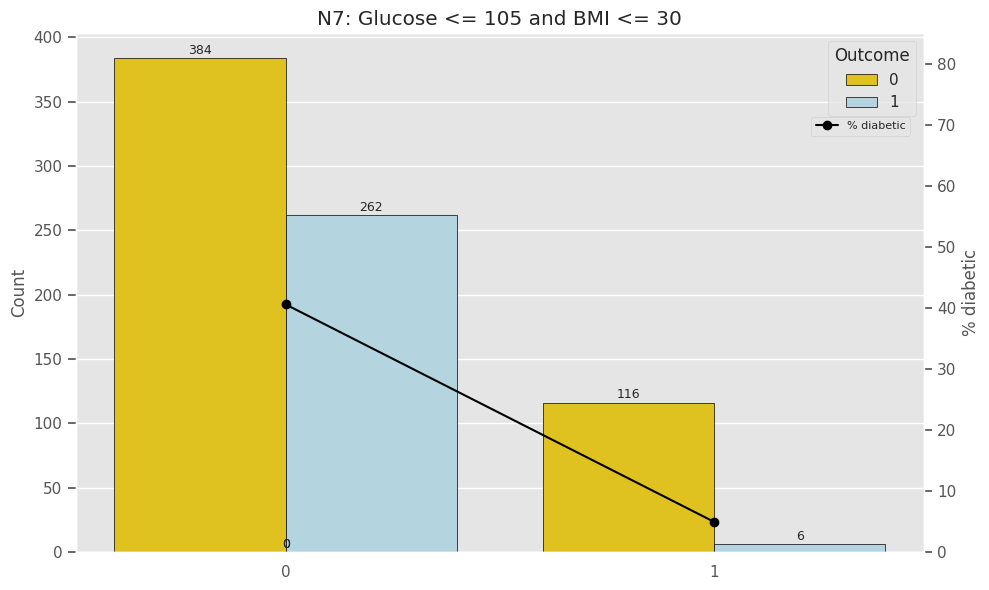

In [ ]:
barplot('N7', 'N7: Glucose <= 105 and BMI <= 30')

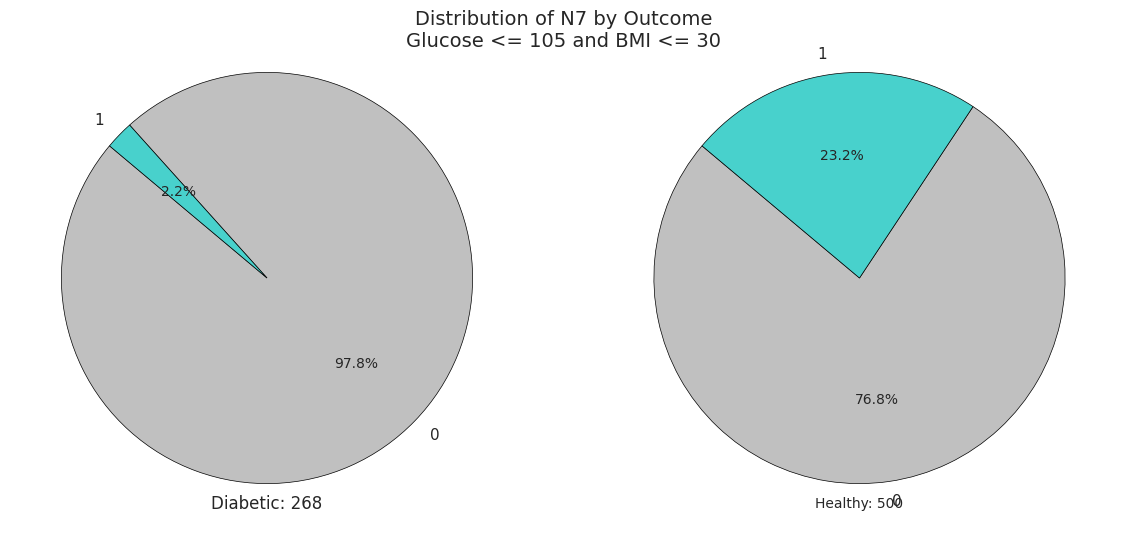

In [ ]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

<Axes: xlabel='Insulin', ylabel='Count'>

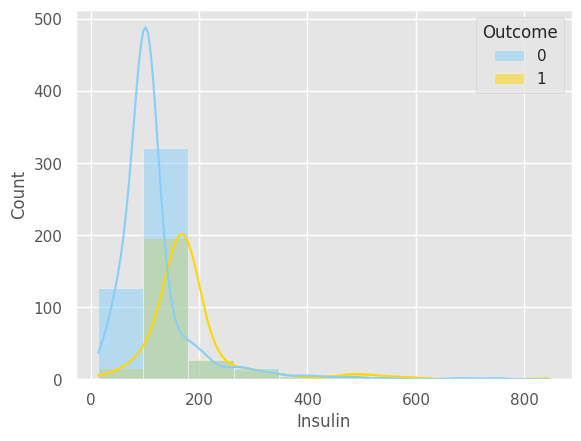

In [ ]:
sns.histplot(data=df, x='Insulin', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

In [ ]:
df.loc[:,'N9']=0
df.loc[(df['Insulin']<200),'N9']=1

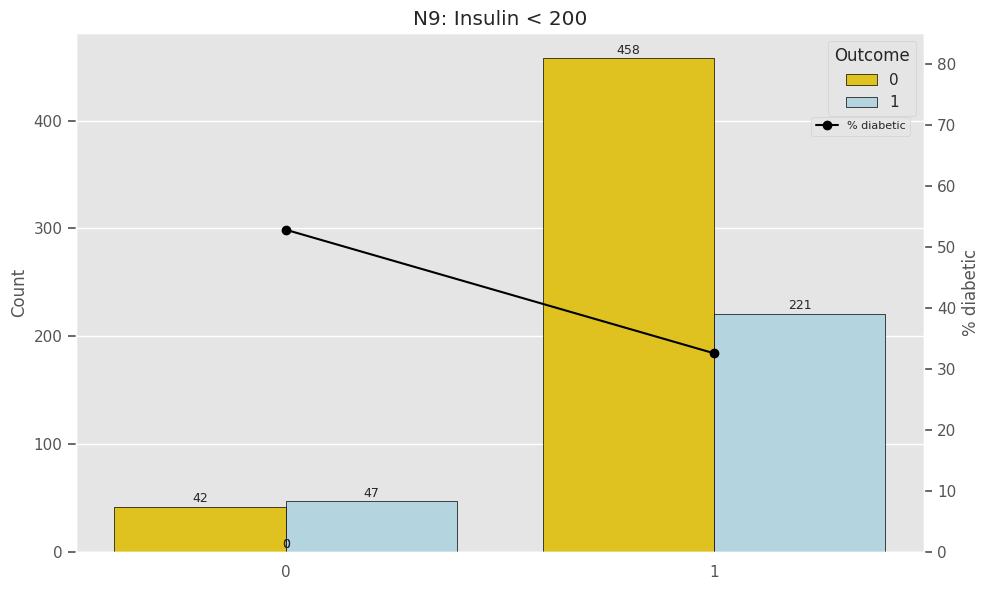

In [ ]:
barplot('N9', 'N9: Insulin < 200')

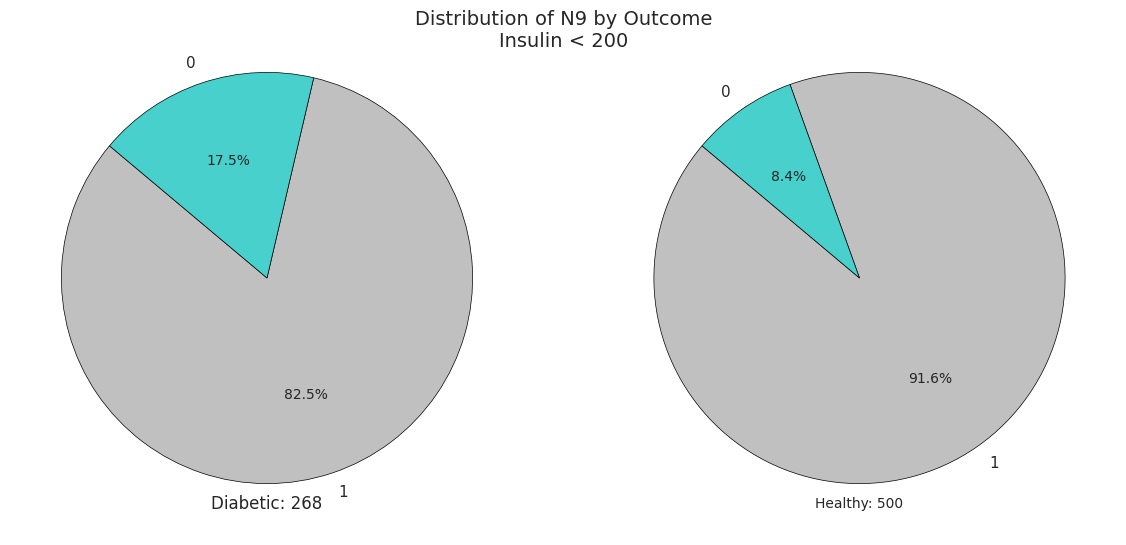

In [ ]:
plot_pie('N9', 'Insulin < 200')

In [ ]:
df.loc[:,'N10']=0
df.loc[(df['BloodPressure']<80),'N10']=1

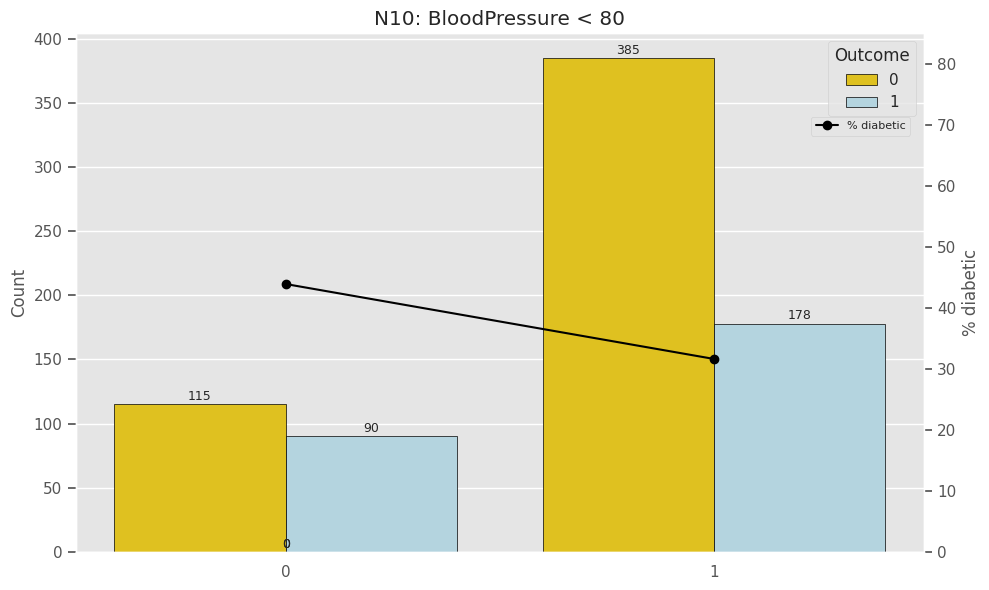

In [ ]:
barplot('N10', 'N10: BloodPressure < 80')

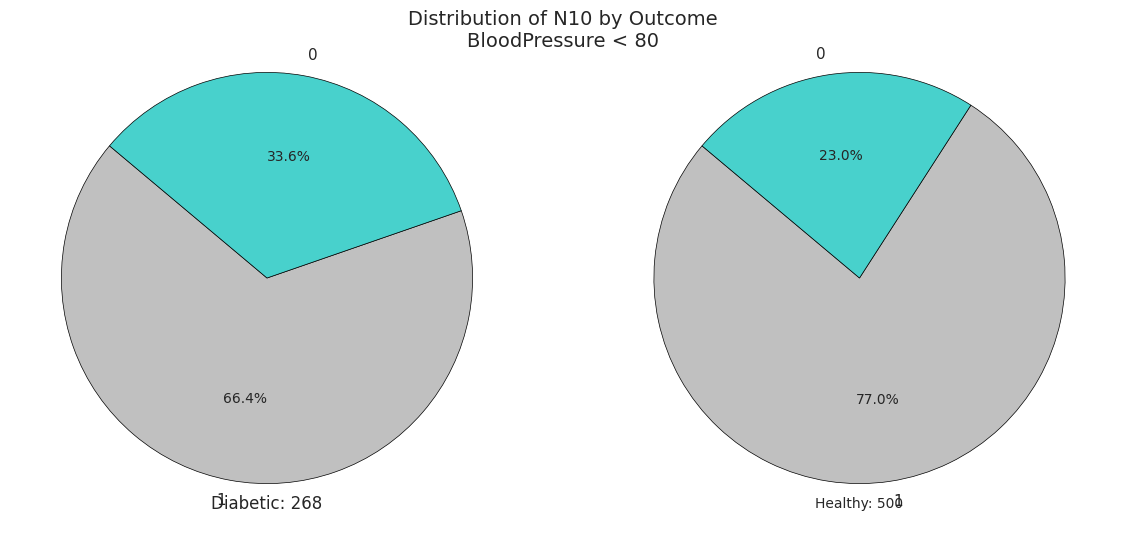

In [ ]:
plot_pie('N10', 'BloodPressure < 80')

<Axes: xlabel='Pregnancies', ylabel='Count'>

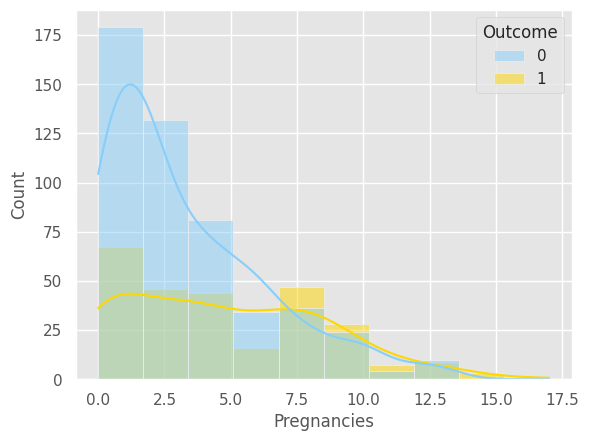

In [ ]:
sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

In [ ]:
df.loc[:,'N11']=0
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0) ,'N11']=1

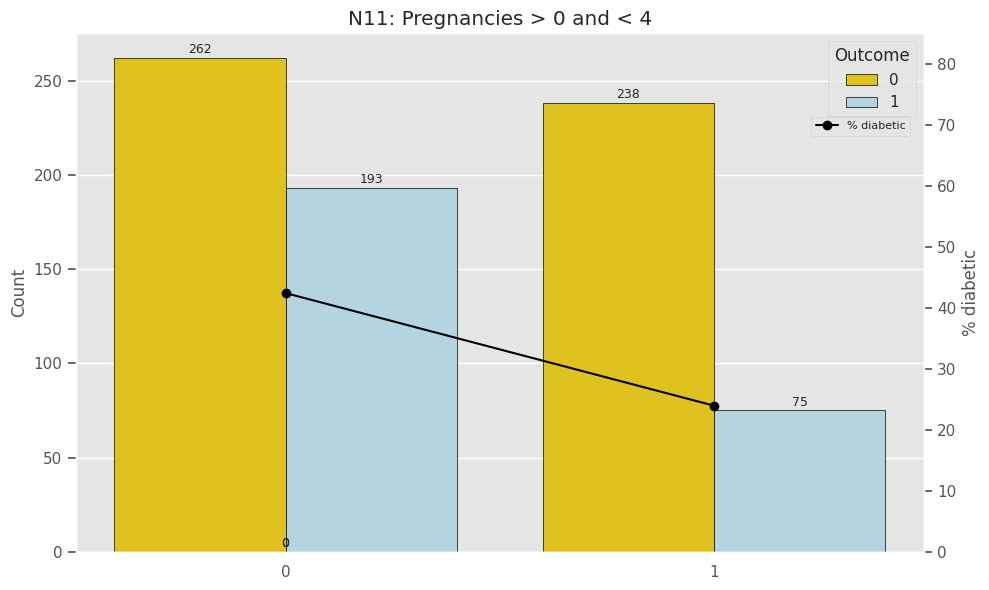

In [ ]:
barplot('N11', 'N11: Pregnancies > 0 and < 4')

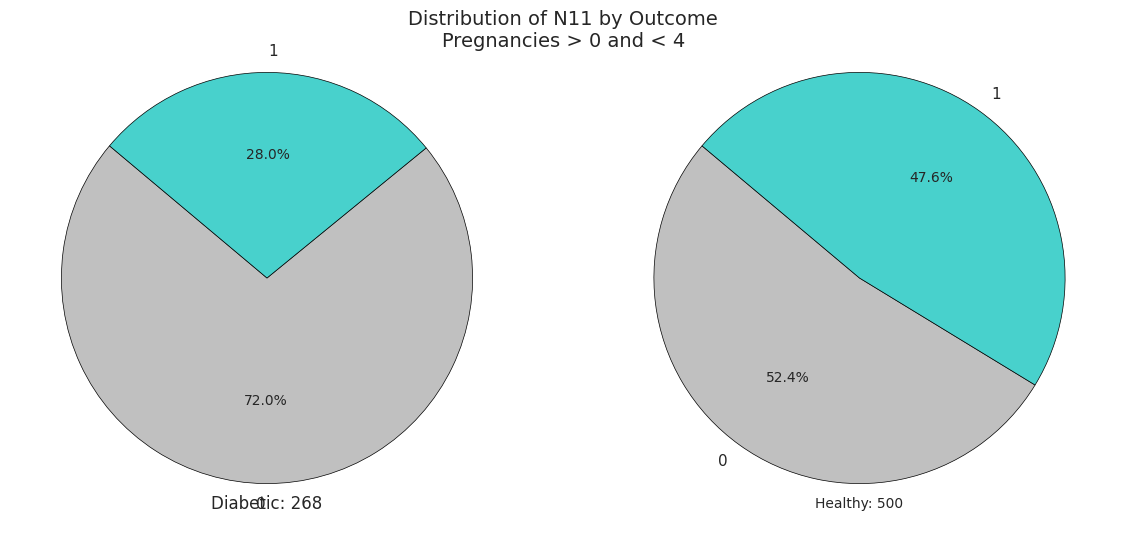

In [ ]:
plot_pie('N11', 'Pregnancies > 0 and < 4')

In [ ]:
df['N0'] = df['BMI'] * df['SkinThickness']

df['N8'] =  df['Pregnancies'] / df['Age']

df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']

df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']

df['N14'] = df['Age'] / df['Insulin']

In [ ]:
D = df[(df['Outcome'] != 0)]
H = df[(df['Outcome'] == 0)]

<Axes: xlabel='N0', ylabel='Count'>

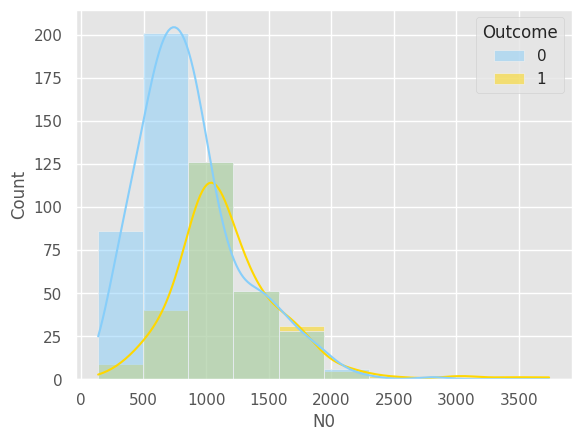

In [ ]:
sns.histplot(data=df, x='N0', hue='Outcome', kde=True, bins=10, palette=['lightskyblue', 'gold'])

In [ ]:
df.loc[:,'N15']=0
df.loc[(df['N0']<1034) ,'N15']=1

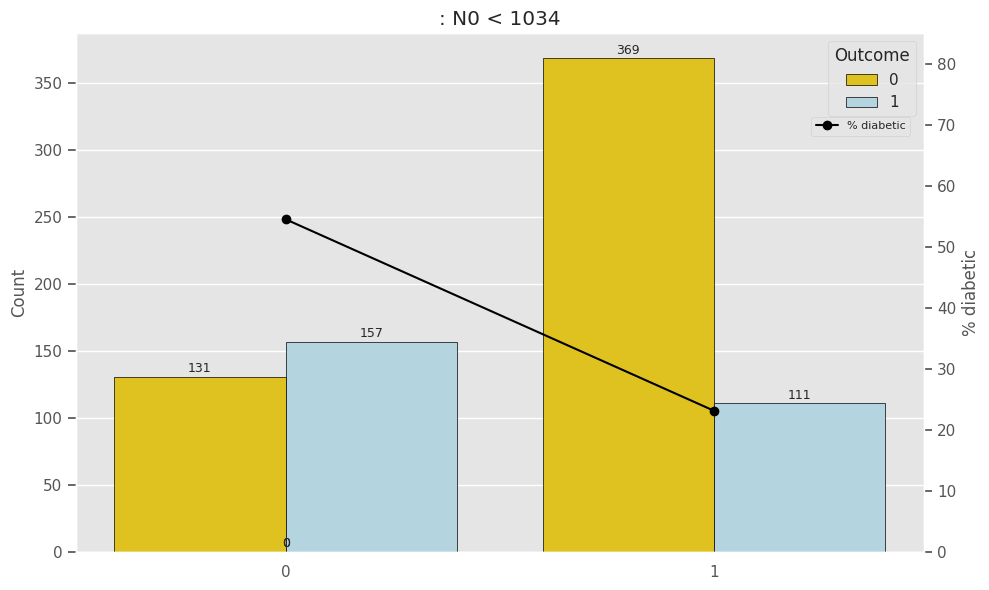

In [ ]:
barplot('N15', ': N0 < 1034')

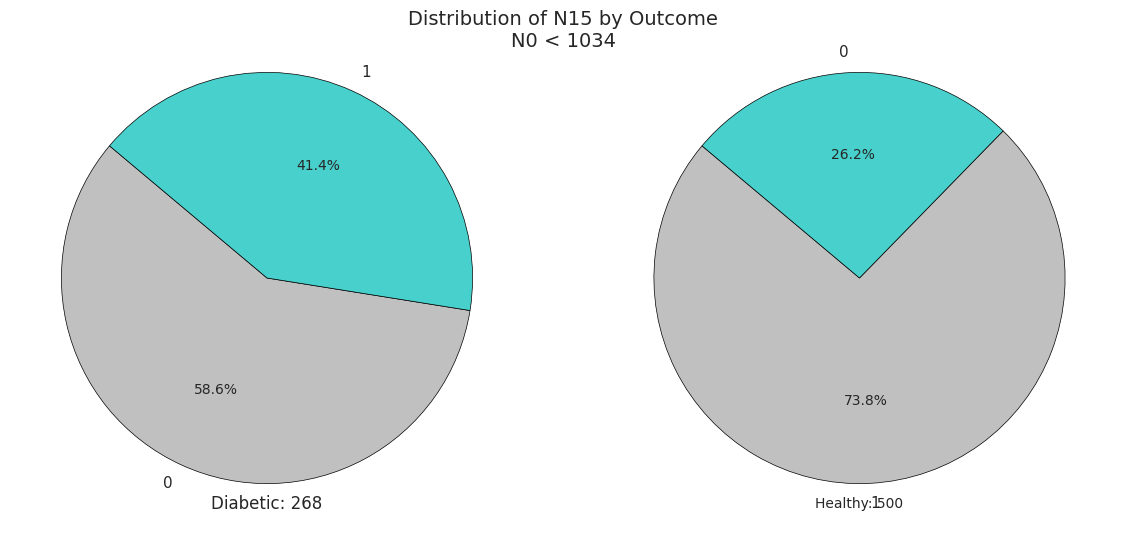

In [ ]:
plot_pie('N15', 'N0 < 1034')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   N1                        768 non-null    int64  
 10  N2                        768 non-null    int64  
 11  N3                        768 non-null    int64  
 12  N4                        768 non-null    int64  
 13  N5                        768 non-null    int64  
 14  N6        

<Axes: >

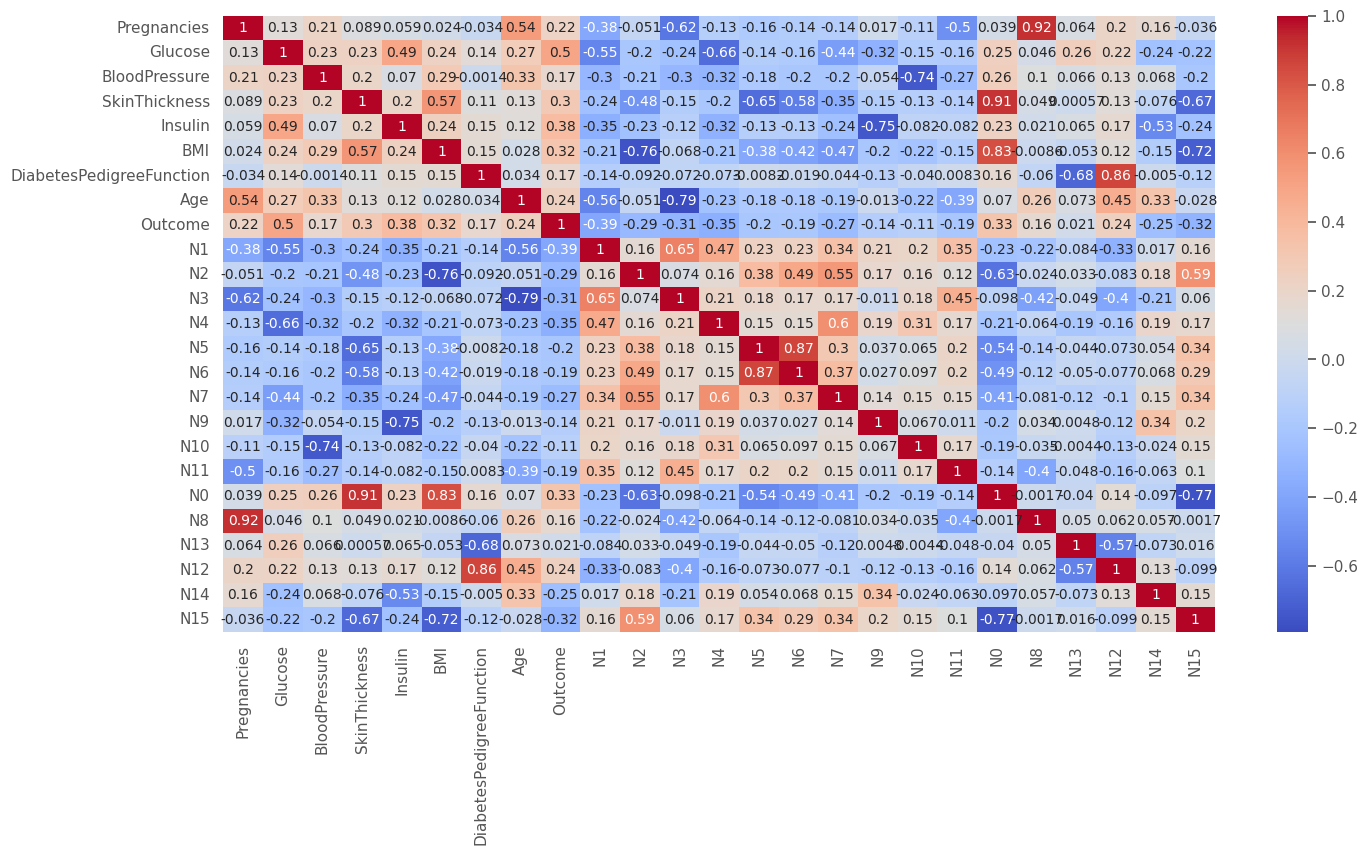

In [ ]:
cor_mat = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')

# **Modelling 1** (Data Asli + Feature Extraction)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2     84.0           70.0           27.0    102.5  30.1   
618            9    112.0           82.0           24.0    169.5  28.2   
346            1    139.0           46.0           19.0     83.0  28.7   
294            0    161.0           50.0           27.0    102.5  21.9   
231            6    134.0           80.0           37.0    370.0  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5    139.0           64.0           35.0    140.0  28.6   
106            1     96.0          122.0           27.0    102.5  22.4   
270           10    101.0           86.0           37.0    169.5  45.6   
435            0    141.0           74.5           32.0    169.5  42.4   
102            0    125.0           96.0           27.0    102.5  22.5   

     DiabetesPedigreeFunction  Age  N1  N2  ...  N7  N9  N10  N11      N0  \
60                      0.304   21   1   0  ...   0   1    1    1   812.7   
618                     1.282   50   0   1  ...   0   1    0    0   676.8   
346                     0.654   22   0   1  ...   0   1    1    1   545.3   
294                     0.254   65   0   1  ...   0   1    1    0   591.3   
231                     0.238   46   0   0  ...   0   0    0    0  1709.4   
..                        ...  ...  ..  ..  ...  ..  ..  ...  ...     ...   
71                      0.411   26   0   1  ...   0   1    1    0  1001.0   
106                     0.207   27   1   1  ...   1   1    0    1   604.8   
270                     1.136   38   0   0  ...   0   1    0    0  1687.2   
435                     0.205   29   0   0  ...   0   1    1    0  1356.8   
102                     0.262   21   0   1  ...   0   1    0    0   607.5   

           N8         N13     N12       N14  N15  
60   0.095238  276.315789   6.384  0.204878    1  
618  0.180000   87.363495  64.100  0.294985    1  
346  0.045455  212.538226  14.388  0.265060    1  
294  0.000000  633.858268  16.510  0.634146    1  
231  0.130435  563.025210  10.948  0.124324    0  
..        ...         ...     ...       ...  ...  
71   0.192308  338.199513  10.686  0.185714    1  
106  0.037037  463.768116   5.589  0.263415    1  
270  0.263158   88.908451  43.168  0.224189    0  
435  0.000000  687.804878   5.945  0.171091    0  
102  0.000000  477.099237   5.502  0.204878    1  

[614 rows x 24 columns]

In [ ]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6     98.0           58.0           33.0    190.0  34.0   
324            2    112.0           75.0           32.0    102.5  35.7   
624            2    108.0           64.0           27.0    102.5  30.8   
690            8    107.0           80.0           27.0    102.5  24.6   
473            7    136.0           90.0           27.0    102.5  29.9   
..           ...      ...            ...            ...      ...   ...   
355            9    165.0           88.0           32.0    169.5  30.4   
534            1     77.0           56.0           30.0     56.0  33.3   
344            8     95.0           72.0           27.0    102.5  36.8   
296            2    146.0           70.0           38.0    360.0  28.0   
462            8     74.0           70.0           40.0     49.0  35.3   

     DiabetesPedigreeFunction  Age  N1  N2  ...  N7  N9  N10  N11      N0  \
668                     0.430   43   0   0  ...   0   1    1    0  1122.0   
324                     0.148   21   1   0  ...   0   1    1    1  1142.4   
624                     0.158   21   1   0  ...   0   1    1    1   831.6   
690                     0.856   34   0   1  ...   0   1    0    0   664.2   
473                     0.210   50   0   1  ...   0   1    0    0   807.3   
..                        ...  ...  ..  ..  ...  ..  ..  ...  ...     ...   
355                     0.302   49   0   0  ...   0   1    0    0   972.8   
534                     1.251   24   1   0  ...   0   1    1    1   999.0   
344                     0.485   57   0   0  ...   0   1    1    0   993.6   
296                     0.337   29   0   1  ...   0   0    1    1  1064.0   
462                     0.705   39   0   0  ...   0   1    1    0  1412.0   

           N8         N13     N12       N14  N15  
668  0.139535  227.906977  18.490  0.226316    0  
324  0.095238  756.756757   3.108  0.204878    0  
624  0.095238  683.544304   3.318  0.204878    1  
690  0.235294  125.000000  29.104  0.331707    1  
473  0.140000  647.619048  10.500  0.487805    1  
..        ...         ...     ...       ...  ...  
355  0.183673  546.357616  14.798  0.289086    1  
534  0.041667   61.550759  30.024  0.428571    1  
344  0.140351  195.876289  27.645  0.556098    1  
296  0.068966  433.234421   9.773  0.080556    0  
462  0.205128  104.964539  27.495  0.795918    0  

[154 rows x 24 columns]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
import pandas as pd
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print(f"Accuracy (Test Set): {accuracy_score(y_test, y_pred):.3f}")
    print(f"Accuracy (Train Set): {accuracy_score(y_train, y_pred_train):.3f}")
    print(f"Precision (Test Set): {precision_score(y_test, y_pred):.3f}")
    print(f"Precision (Train Set): {precision_score(y_train, y_pred_train):.3f}")
    print(f"Recall (Test Set): {recall_score(y_test, y_pred):.3f}")
    print(f"Recall (Train Set): {recall_score(y_train, y_pred_train):.3f}")
    print(f"F1-Score (Test Set): {f1_score(y_test, y_pred):.3f}")
    print(f"F1-Score (Train Set): {f1_score(y_train, y_pred_train):.3f}")
    print(f"ROC AUC (Test Set): {roc_auc_score(y_test, y_pred_proba[:, 1]):.3f}")
    print(f"ROC AUC (Train Set): {roc_auc_score(y_train, y_pred_proba_train[:, 1]):.3f}")

    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print(f"Recall (Crossval Train): {score['train_score'].mean():.3f}")
    print(f"Recall (Crossval Test): {score['test_score'].mean():.3f}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')
    plt.show()

def show_best_hyperparameter(model):
    params = model.best_estimator_.get_params()
    for param, value in params.items():
        if isinstance(value, float):
            print(f"{param}: {value:.3f}")
        else:
            print(f"{param}: {value}")

## XGB

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
eval_classification(xgb)

Accuracy (Test Set): 0.838
Accuracy (Train Set): 1.000
Precision (Test Set): 0.778
Precision (Train Set): 1.000
Recall (Test Set): 0.764
Recall (Train Set): 1.000
F1-Score (Test Set): 0.771
F1-Score (Train Set): 1.000
ROC AUC (Test Set): 0.932
ROC AUC (Train Set): 1.000
Recall (Crossval Train): 1.000
Recall (Crossval Test): 0.821


## RF

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.870
Accuracy (Train Set): 1.000
Precision (Test Set): 0.818
Precision (Train Set): 1.000
Recall (Test Set): 0.818
Recall (Train Set): 1.000
F1-Score (Test Set): 0.818
F1-Score (Train Set): 1.000
ROC AUC (Test Set): 0.926
ROC AUC (Train Set): 1.000
Recall (Crossval Train): 1.000
Recall (Crossval Test): 0.773


## LR

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
eval_classification(lr)

Accuracy (Test Set): 0.734
Accuracy (Train Set): 0.772
Precision (Test Set): 0.625
Precision (Train Set): 0.721
Recall (Test Set): 0.636
Recall (Train Set): 0.559
F1-Score (Test Set): 0.631
F1-Score (Train Set): 0.630
ROC AUC (Test Set): 0.814
ROC AUC (Train Set): 0.852


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Recall (Crossval Train): 0.571
Recall (Crossval Test): 0.567


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Modelling 2

In [ ]:
df1 = df.copy()

In [ ]:
df1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.089844  141.753906   
std       3.369578   30.464161      12.106039       8.890820   89.100847   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  768.000000                768.000000  768.000000  768.000000   
mean    32.434635                  0.471876   33.240885    0.348958   
std      6.880498                  0.331329   11.760232    0.476951   
min     18.200000                  0.078000   21.000000    0.000000   
25%     27.500000                  0.243750   24.000000    0.000000   
50%     32.050000                  0.372500   29.000000    0.000000   
75%     36.600000                  0.626250   41.000000    1.000000   
max     67.100000                  2.420000   81.000000    1.000000   

               N1  ...          N7          N9         N10         N11  \
count  768.000000  ...  768.000000  768.000000  768.000000  768.000000   
mean     0.351562  ...    0.158854    0.884115    0.733073    0.407552   
std      0.477769  ...    0.365778    0.320296    0.442642    0.491699   
min      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  ...    0.000000    1.000000    0.000000    0.000000   
50%      0.000000  ...    0.000000    1.000000    1.000000    0.000000   
75%      1.000000  ...    0.000000    1.000000    1.000000    1.000000   
max      1.000000  ...    1.000000    1.000000    1.000000    1.000000   

                N0          N8          N13         N12         N14  \
count   768.000000  768.000000   768.000000  768.000000  768.000000   
mean    978.102734    0.108210   381.611700   15.816187    0.299661   
std     453.893312    0.081790   259.350699   12.926774    0.195716   
min     137.200000    0.000000    48.263685    1.638000    0.033824   
25%     664.575000    0.041667   188.015902    7.267500    0.193682   
50%     923.700000    0.095238   306.872900   11.413500    0.253687   
75%    1202.725000    0.166667   505.855765   19.364000    0.360976   
max    3742.200000    0.368421  1965.909091   82.137000    1.818182   

              N15  
count  768.000000  
mean     0.625000  
std      0.484438  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 25 columns]

## Hapus Outlier

In [ ]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
outliers_dict = {}

for col in selected_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    outliers_count = outliers.shape[0]

    outliers_dict[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': outliers_count
    }

outliers_summary = pd.DataFrame(outliers_dict).T
print(outliers_summary)

df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

                          Lower Bound  Upper Bound  Outliers Count
Glucose                         39.00       201.00             0.0
BloodPressure                   40.00       104.00            14.0
SkinThickness                   14.50        42.50            87.0
Insulin                          2.00       270.00            51.0
BMI                             13.85        50.25             8.0
DiabetesPedigreeFunction        -0.33         1.20            29.0
Age                             -1.50        66.50             9.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 767
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               759 non-null    int64  
 1   Glucose                   759 non-null    float64
 2   BloodPressure             759 non-null    float64
 3   SkinThickness             759 non-null    float64
 4   Insulin                   759 non-null    float64
 5   BMI                       759 non-null    float64
 6   DiabetesPedigreeFunction  759 non-null    float64
 7   Age                       759 non-null    int64  
 8   Outcome                   759 non-null    int64  
 9   N1                        759 non-null    int64  
 10  N2                        759 non-null    int64  
 11  N3                        759 non-null    int64  
 12  N4                        759 non-null    int64  
 13  N5                        759 non-null    int64  
 14  N6             

In [ ]:
df1['Outcome'].value_counts()

Outcome
0    493
1    266
Name: count, dtype: int64

In [ ]:
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(607, 24)

In [ ]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
197            3    107.0           62.0           13.0     48.0  22.9   
353            1     90.0           62.0           12.0     43.0  27.2   
266            0    138.0           74.5           32.0    169.5  36.3   
90             1     80.0           55.0           27.0    102.5  19.1   
472            0    119.0           66.0           27.0    102.5  38.8   
..           ...      ...            ...            ...      ...   ...   
71             5    139.0           64.0           35.0    140.0  28.6   
106            1     96.0          122.0           27.0    102.5  22.4   
271            2    108.0           62.0           32.0     56.0  25.2   
437            5    147.0           75.0           27.0    102.5  29.9   
102            0    125.0           96.0           27.0    102.5  22.5   

     DiabetesPedigreeFunction  Age  N1  N2  ...  N7  N9  N10  N11      N0  \
197                     0.678   23   1   1  ...   0   1    1    1   297.7   
353                     0.580   24   1   1  ...   1   1    1    1   326.4   
266                     0.933   25   0   0  ...   0   1    1    0  1161.6   
90                      0.258   21   1   1  ...   1   1    1    1   515.7   
472                     0.259   22   1   0  ...   0   1    1    0  1047.6   
..                        ...  ...  ..  ..  ...  ..  ..  ...  ...     ...   
71                      0.411   26   0   1  ...   0   1    1    0  1001.0   
106                     0.207   27   1   1  ...   1   1    0    1   604.8   
271                     0.128   21   1   1  ...   0   1    1    1   806.4   
437                     0.434   28   0   1  ...   0   1    1    0   807.3   
102                     0.262   21   0   1  ...   0   1    0    0   607.5   

           N8         N13     N12       N14  N15  
197  0.130435  157.817109  15.594  0.479167    1  
353  0.041667  155.172414  13.920  0.558140    1  
266  0.000000  147.909968  23.325  0.147493    0  
90   0.047619  310.077519   5.418  0.204878    1  
472  0.000000  459.459459   5.698  0.214634    0  
..        ...         ...     ...       ...  ...  
71   0.192308  338.199513  10.686  0.185714    1  
106  0.037037  463.768116   5.589  0.263415    1  
271  0.095238  843.750000   2.688  0.375000    1  
437  0.178571  338.709677  12.152  0.273171    1  
102  0.000000  477.099237   5.502  0.204878    1  

[607 rows x 24 columns]

## XGB

In [ ]:
xgb2 = XGBClassifier(random_state=42)
xgb2.fit(X_train, y_train)
eval_classification(xgb2)

Accuracy (Test Set): 0.862
Accuracy (Train Set): 1.000
Precision (Test Set): 0.837
Precision (Train Set): 1.000
Recall (Test Set): 0.759
Recall (Train Set): 1.000
F1-Score (Test Set): 0.796
F1-Score (Train Set): 1.000
ROC AUC (Test Set): 0.933
ROC AUC (Train Set): 1.000
Recall (Crossval Train): 1.000
Recall (Crossval Test): 0.820


## RF

In [ ]:
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train, y_train)
eval_classification(rf2)

Accuracy (Test Set): 0.829
Accuracy (Train Set): 1.000
Precision (Test Set): 0.818
Precision (Train Set): 1.000
Recall (Test Set): 0.667
Recall (Train Set): 1.000
F1-Score (Test Set): 0.735
F1-Score (Train Set): 1.000
ROC AUC (Test Set): 0.905
ROC AUC (Train Set): 1.000
Recall (Crossval Train): 1.000
Recall (Crossval Test): 0.801


## Logreg

In [ ]:
logreg2 = LogisticRegression(random_state=42)
logreg2.fit(X_train, y_train)
eval_classification(logreg2)

Accuracy (Test Set): 0.743
Accuracy (Train Set): 0.784
Precision (Test Set): 0.683
Precision (Train Set): 0.737
Recall (Test Set): 0.519
Recall (Train Set): 0.594
F1-Score (Test Set): 0.589
F1-Score (Train Set): 0.658
ROC AUC (Test Set): 0.841
ROC AUC (Train Set): 0.854


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Recall (Crossval Train): 0.584
Recall (Crossval Test): 0.583


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Modelling 3 (Algen)

In [ ]:
X = df1.drop('Outcome', axis=1).values
y = df1['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# GA setup
n_features = X_train.shape[1]

In [ ]:
# Define fitness function
def evaluate(individual):
    selected_features = [index for index, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0,
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train[:, selected_features], y_train)
    y_pred = clf.predict(X_test[:, selected_features])
    return recall_score(y_test, y_pred),

# GA structure
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run GA
population = toolbox.population(n=50)
n_generations = 20
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_generations, verbose=False)

# Best individual
best_ind = tools.selBest(population, k=1)[0]
selected_features = [index for index, bit in enumerate(best_ind) if bit == 1]
print("Selected features:", selected_features)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Selected features: [1, 2, 4, 5, 6, 7, 8, 10, 15, 16, 17, 18, 19, 20, 21]


In [ ]:
# Final Model Training
final_clf = RandomForestClassifier(random_state=42)
final_clf.fit(X_train[:, selected_features], y_train)

# Evaluation
final_y_pred = final_clf.predict(X_test[:, selected_features])
final_recall = recall_score(y_test, final_y_pred)
print(f"Final Recall: {final_recall:.4f}")

Final Recall: 0.7778


In [ ]:
# Mendapatkan nama fitur berdasarkan indeks yang dipilih
feature_names = df1.drop('Outcome', axis=1).columns
selected_feature_names = [feature_names[i] for i in selected_features]

print("Selected feature names:", selected_feature_names)

Selected feature names: ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'N1', 'N3', 'N9', 'N10', 'N11', 'N0', 'N8', 'N13', 'N12']


In [ ]:
selected_feature_names=  ['Glucose', 'Insulin', 'N2', 'N4', 'N6', 'N10', 'N12', 'N15']
X = df1[selected_feature_names].values
y = df1['Outcome'].values

# Membagi data menjadi train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(607, 8)

In [ ]:
X_test.shape

(152, 8)

## GA

### XGB

In [ ]:
xgb3 = XGBClassifier(random_state=42)
xgb3.fit(X_train, y_train)
eval_classification(xgb3)

Accuracy (Test Set): 0.855
Accuracy (Train Set): 1.000
Precision (Test Set): 0.820
Precision (Train Set): 1.000
Recall (Test Set): 0.759
Recall (Train Set): 1.000
F1-Score (Test Set): 0.788
F1-Score (Train Set): 1.000
ROC AUC (Test Set): 0.926
ROC AUC (Train Set): 1.000
Recall (Crossval Train): 1.000
Recall (Crossval Test): 0.805


### RF

In [ ]:
rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X_train, y_train)
eval_classification(rf3)

Accuracy (Test Set): 0.868
Accuracy (Train Set): 1.000
Precision (Test Set): 0.840
Precision (Train Set): 1.000
Recall (Test Set): 0.778
Recall (Train Set): 1.000
F1-Score (Test Set): 0.808
F1-Score (Train Set): 1.000
ROC AUC (Test Set): 0.926
ROC AUC (Train Set): 1.000
Recall (Crossval Train): 1.000
Recall (Crossval Test): 0.805


### Logreg

In [ ]:
logreg3 = LogisticRegression(random_state=42)
logreg3.fit(X_train, y_train)
eval_classification(logreg3)

Accuracy (Test Set): 0.796
Accuracy (Train Set): 0.796
Precision (Test Set): 0.767
Precision (Train Set): 0.753
Recall (Test Set): 0.611
Recall (Train Set): 0.618
F1-Score (Test Set): 0.680
F1-Score (Train Set): 0.679
ROC AUC (Test Set): 0.841
ROC AUC (Train Set): 0.863
Recall (Crossval Train): 0.624
Recall (Crossval Test): 0.598


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## GA + GridsearchCV

### XGBoost + GA + GridSearchCV

In [ ]:
import xgboost as xgb
param_grid = {
    'n_estimators': [100, 150],               # Jumlah pohon yang moderat
    'max_depth': [6, 7],                       # Kedalaman pohon moderat
    'learning_rate': [0.05, 0.1],              # Learning rate moderat
    'min_child_weight': [5, 10],                # Nilai moderat untuk menghindari overfitting
    'subsample': [0.8],                        # Menggunakan sebagian data
    'colsample_bytree': [0.8],                 # Menggunakan sebagian fitur
    'gamma': [0, 0.1]                          # Mengatur pembelahan pohon lebih lanjut
}

xgb_model = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

xgb_best = grid_search.best_estimator_
xgb_best.fit(X_train, y_train)
eval_classification(xgb_best)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 150, 'subsample': 0.8}
Accuracy (Test Set): 0.868
Accuracy (Train Set): 0.903
Precision (Test Set): 0.840
Precision (Train Set): 0.873
Recall (Test Set): 0.778
Recall (Train Set): 0.844
F1-Score (Test Set): 0.808
F1-Score (Train Set): 0.859
ROC AUC (Test Set): 0.935
ROC AUC (Train Set): 0.968
Recall (Crossval Train): 0.838
Recall (Crossval Test): 0.812


### RF + GA + GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 150],            # Jumlah pohon lebih kecil
    'max_depth': [10, 20, 30],             # Tambahkan opsi kedalaman yang lebih dalam
    'min_samples_split': [10, 20],         # Sampel minimum untuk split lebih besar
    'min_samples_leaf': [5, 10],           # Sampel minimum per leaf lebih besar
    'max_features': ['sqrt', 'log2']      # Batasi jumlah fitur untuk split
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)
eval_classification(rf_best)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy (Test Set): 0.855
Accuracy (Train Set): 0.921
Precision (Test Set): 0.808
Precision (Train Set): 0.890
Recall (Test Set): 0.778
Recall (Train Set): 0.882
F1-Score (Test Set): 0.792
F1-Score (Train Set): 0.886
ROC AUC (Test Set): 0.929
ROC AUC (Train Set): 0.980
Recall (Crossval Train): 0.872
Recall (Crossval Test): 0.808


### Logreg + GA + GridSearchCV

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers yang mendukung penalization
    'penalty': ['l1', 'l2'],  # Penalization term
    'max_iter': [100, 200, 300],  # Iterasi maksimal
}

logreg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

logreg_best = grid_search.best_estimator_
logreg_best.fit(X_train, y_train)
eval_classification(logreg_best)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters found:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy (Test Set): 0.783
Accuracy (Train Set): 0.796
Precision (Test Set): 0.733
Precision (Train Set): 0.747
Recall (Test Set): 0.611
Recall (Train Set): 0.627
F1-Score (Test Set): 0.667
F1-Score (Train Set): 0.682
ROC AUC (Test Set): 0.844
ROC AUC (Train Set): 0.859
Recall (Crossval Train): 0.635
Recall (Crossval Test): 0.639
